# ทดสอบกระบวนการสร้างแบบจำลอง Regression ด้วย ML จาก Github Microsoft
https://github.com/MicrosoftDocs/ml-basics/blob/master/02%20-%20Regression.ipynb

In [1]:
'''
2024/01/09 
พัฒนาโค้ดโดย รศ.ดร.นัฐพล มหาวิค 
email:nattaponm@nu.ac.th 
ยูทูป:https://www.youtube.com/@Nattapon_Mahavik/playlists 
หนังสือ: เรดาร์ตรวจอากาศทางอุตุนิยมวิทยา https://www.chulabook.com/education/144567
Github: https://github.com/nattaponm
Scopus: https://www.scopus.com/authid/detail.uri?authorId=55583236600
'''

'\n2024/01/09 \nพัฒนาโค้ดโดย รศ.ดร.นัฐพล มหาวิค \nemail:nattaponm@nu.ac.th \nยูทูป:https://www.youtube.com/@Nattapon_Mahavik/playlists \nหนังสือ: เรดาร์ตรวจอากาศทางอุตุนิยมวิทยา https://www.chulabook.com/education/144567\nGithub: https://github.com/nattaponm\nScopus: https://www.scopus.com/authid/detail.uri?authorId=55583236600\n'

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import geopandas as gpd
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# read & data cleansing

In [3]:
df = pd.read_csv('../2results/df_org_dbz_rain_test160km_full_features.csv')
df.drop(columns=['Unnamed: 0'], axis=1, inplace=True)
df.dropna(inplace=True)
df.reset_index(drop=True, inplace=True)

## explore data

In [4]:
df.describe()

,dBZ_c1,dBZ_c2,dBZ_c3,dBZ_c4,dBZ_p1,dBZ_p2,dBZ_p3,dBZ_p4,rr_MP_c1,rr_MP_c2,...,rr_RF_p4,rr_SC_c1,rr_SC_c2,rr_SC_c3,rr_SC_c4,rr_SC_p1,rr_SC_p2,rr_SC_p3,rr_SC_p4,rain_truth
count,115.000000,115.000000,115.000000,115.000000,115.000000,115.000000,115.000000,115.000000,115.000000,115.000000,...,115.000000,115.000000,115.000000,115.000000,115.000000,115.000000,115.000000,115.000000,115.000000,115.000000
mean,24.165075,24.318751,24.488893,24.373867,24.601365,23.663804,23.524573,23.875508,21.485950,22.993945,...,16.261415,6.790665,7.203598,8.582119,10.970522,10.299129,8.676903,11.318078,29.303282,0.975652
std,7.048577,6.976534,7.254293,7.926288,7.516522,7.834352,8.413912,8.883696,72.238719,71.073650,...,61.280560,18.968629,19.114202,22.034331,29.846563,32.834944,28.082775,35.681490,127.372610,2.637536
min,6.733561,6.803503,7.216430,-0.426609,5.507703,6.751940,5.268919,-0.426609,0.002487,0.002552,...,0.001178,0.002984,0.003052,0.003486,0.000297,0.002010,0.003001,0.001861,0.000297,0.200000
25%,18.883364,19.405293,19.842505,19.216393,18.518317,17.024676,17.246279,17.998344,0.218749,0.266076,...,0.191754,0.149933,0.177892,0.204272,0.166866,0.133247,0.082334,0.088425,0.112834,0.200000
50%,24.045975,24.313274,24.348021,24.440687,25.117842,23.993490,24.095793,23.706970,1.464563,1.616129,...,0.927488,0.791529,0.862757,0.872475,0.898931,1.118222,0.778250,0.804343,0.709588,0.400000
75%,29.309406,29.057806,29.223002,29.291116,29.939352,28.834368,29.211197,29.182938,10.187859,9.281779,...,4.211403,4.320362,3.982413,4.207790,4.293262,5.295067,3.714319,4.185309,4.146147,0.600000
max,40.810944,40.538101,40.296741,40.545963,41.924435,41.902100,42.272858,46.540539,704.860191,637.453043,...,509.725833,176.020134,161.199767,149.133102,161.608837,252.029336,250.221250,281.987798,1116.106593,26.800000


ดูค่าสถิติของข้อมูลในแต่ละตัวแปร

### histograms and box plots ของฝนที่ใช้เป็น label

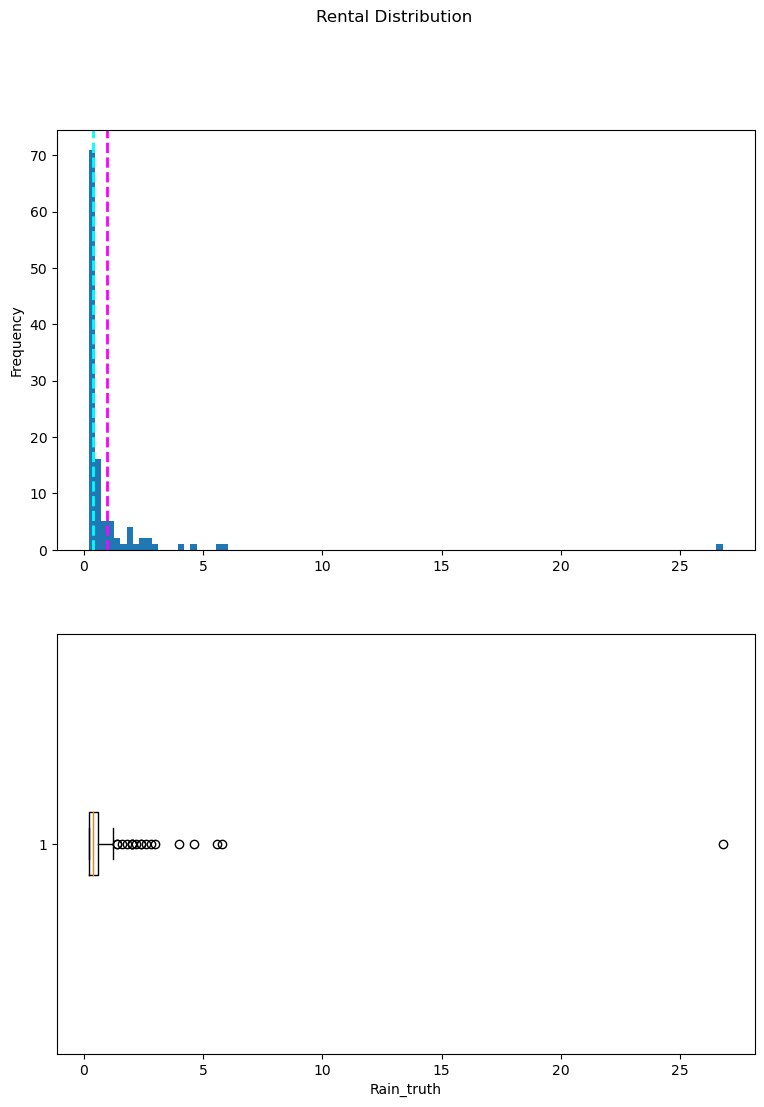

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

# This ensures plots are displayed inline in the Jupyter notebook
%matplotlib inline

# Get the label column
label = df['rain_truth']


# Create a figure for 2 subplots (2 rows, 1 column)
fig, ax = plt.subplots(2, 1, figsize = (9,12))

# Plot the histogram   
ax[0].hist(label, bins=100)
ax[0].set_ylabel('Frequency')

# Add lines for the mean, median, and mode
ax[0].axvline(label.mean(), color='magenta', linestyle='dashed', linewidth=2)
ax[0].axvline(label.median(), color='cyan', linestyle='dashed', linewidth=2)

# Plot the boxplot   
ax[1].boxplot(label, vert=False)
ax[1].set_xlabel('Rain_truth')

# Add a title to the Figure
fig.suptitle('Rental Distribution')

# Show the figure
fig.show()

In [6]:
print(label.mean())
print(label.median())

0.9756521739130435
0.4


ค่าฮิสโตแกรมของฝนภาคพื้นดิน มีค่าฝนเฉลียอยู่ที่ 0.975 mm/hr ในขณะที่ค่ามัธยฐานอยู่ที่ 0.4 mm/hr ส่วน boxplot แสดงถึงค่า outliers ที่มีจำนวนน้อยแสดงด้วยวงกลมที่มีค่าห่างจากค่าเฉลี่ย

### histograms ของฟีเจอร์อื่น


In [7]:
list(df.columns)

['dBZ_c1',
 'dBZ_c2',
 'dBZ_c3',
 'dBZ_c4',
 'dBZ_p1',
 'dBZ_p2',
 'dBZ_p3',
 'dBZ_p4',
 'rain_intensity',
 'rr_MP_c1',
 'rr_MP_c2',
 'rr_MP_c3',
 'rr_MP_c4',
 'rr_MP_p1',
 'rr_MP_p2',
 'rr_MP_p3',
 'rr_MP_p4',
 'rr_RF_c1',
 'rr_RF_c2',
 'rr_RF_c3',
 'rr_RF_c4',
 'rr_RF_p1',
 'rr_RF_p2',
 'rr_RF_p3',
 'rr_RF_p4',
 'rr_SC_c1',
 'rr_SC_c2',
 'rr_SC_c3',
 'rr_SC_c4',
 'rr_SC_p1',
 'rr_SC_p2',
 'rr_SC_p3',
 'rr_SC_p4',
 'rain_truth']

In [8]:
numeric_features = list(df.drop(columns=['rain_intensity', 'rain_truth']))
#numeric_features

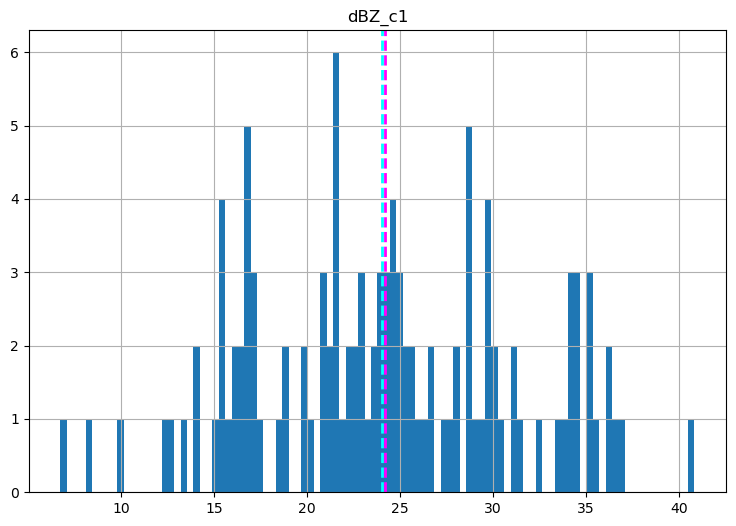

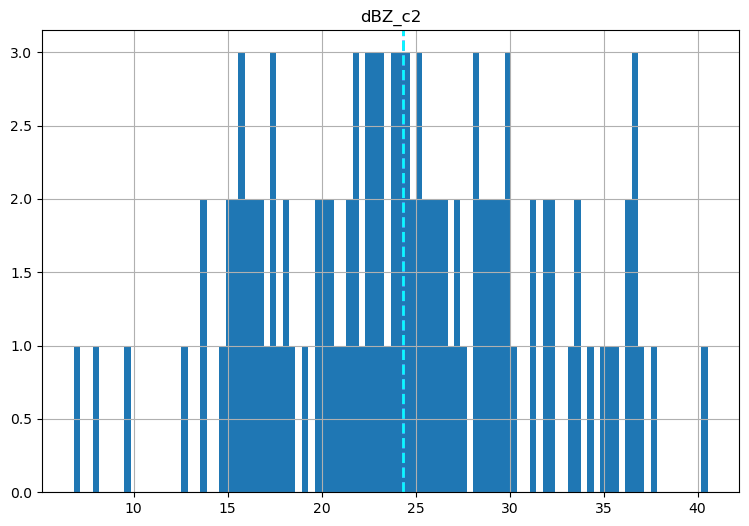

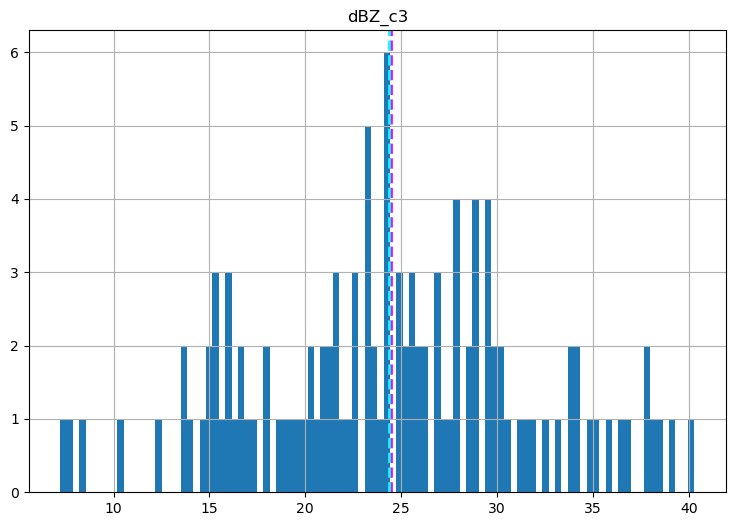

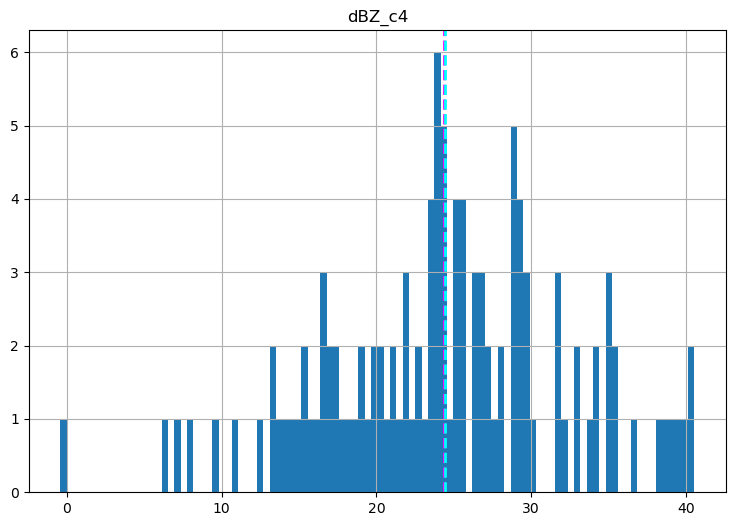

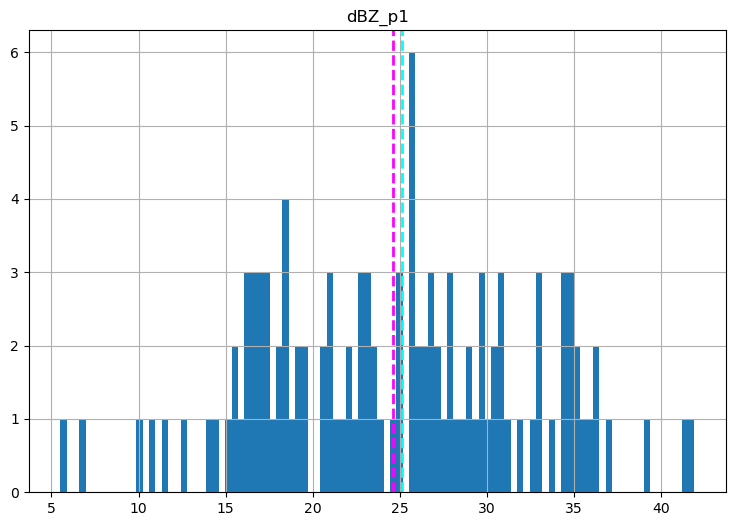

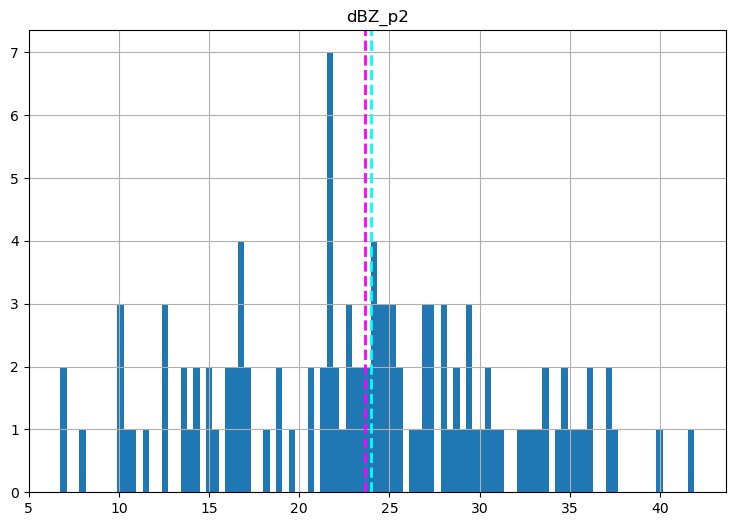

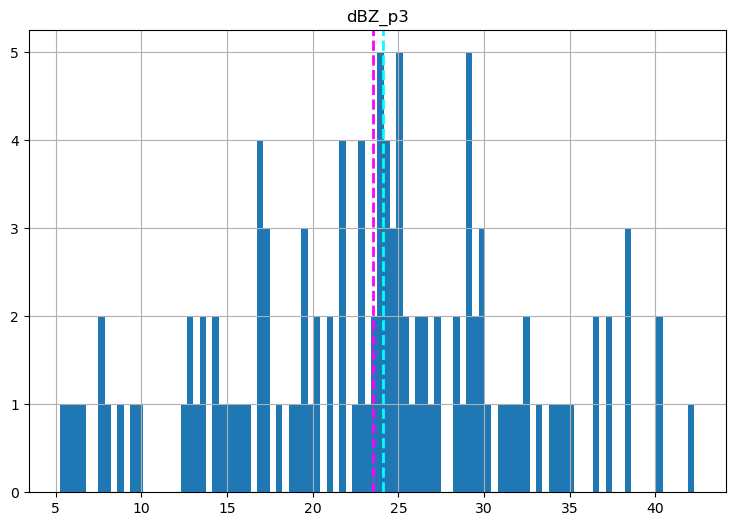

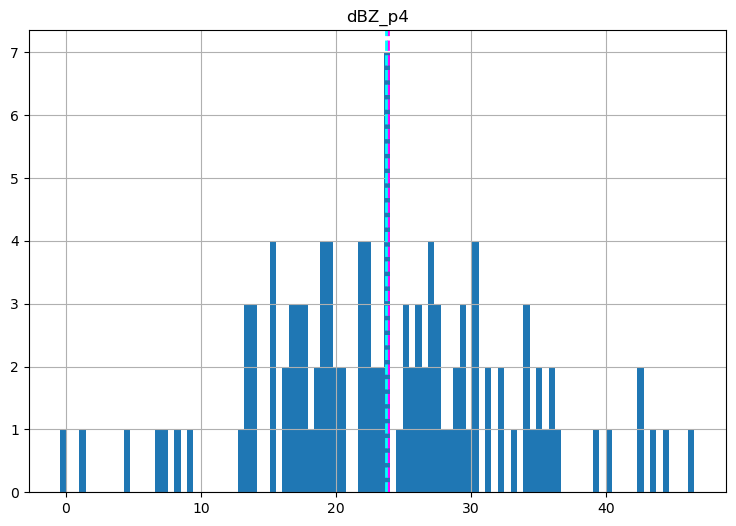

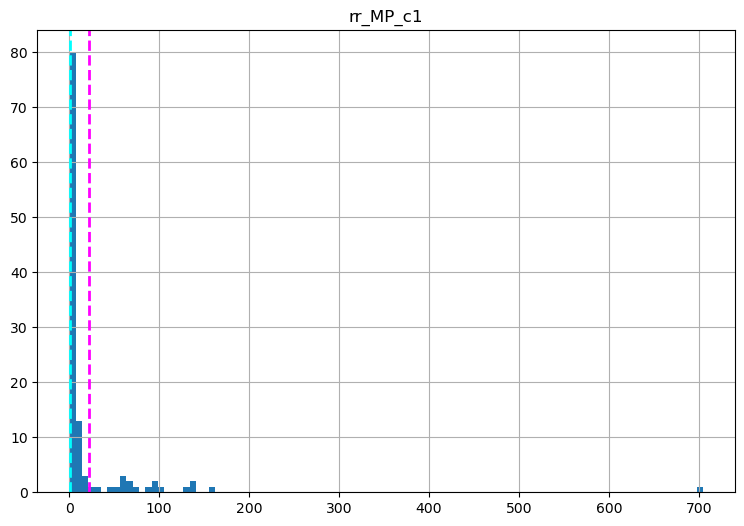

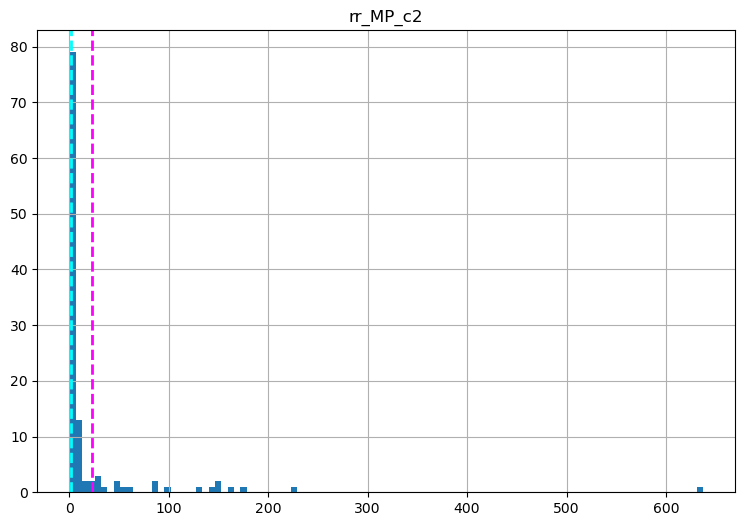

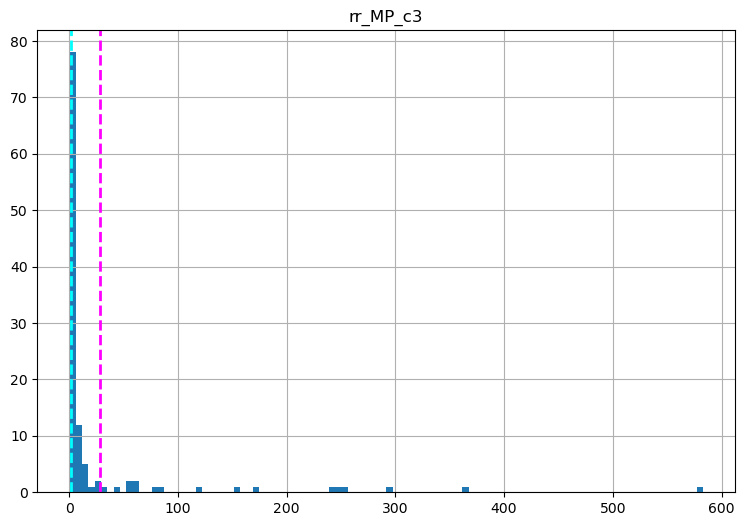

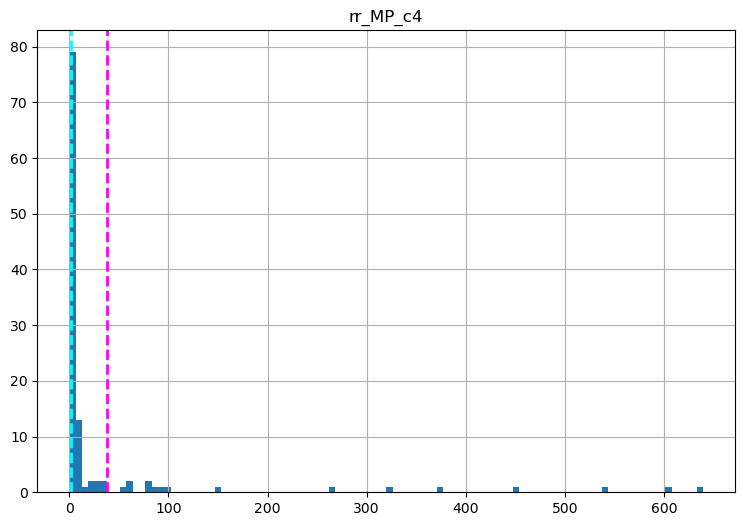

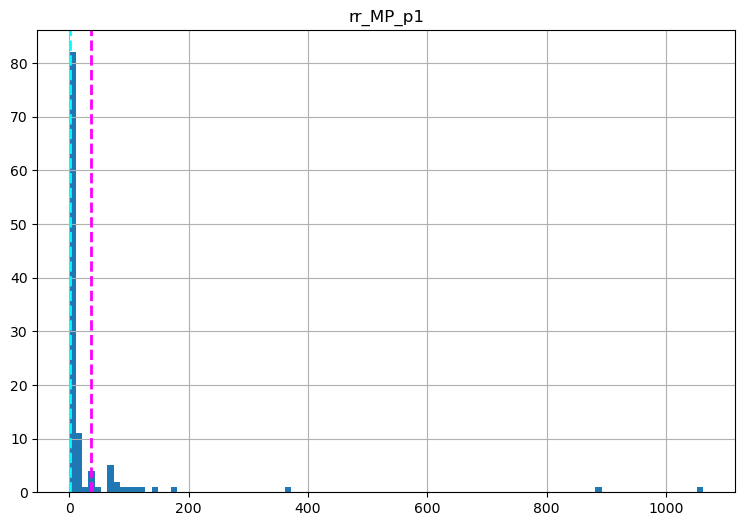

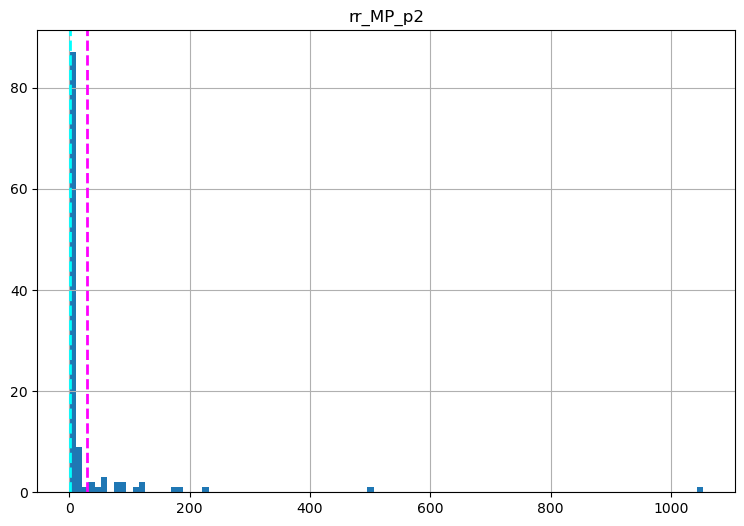

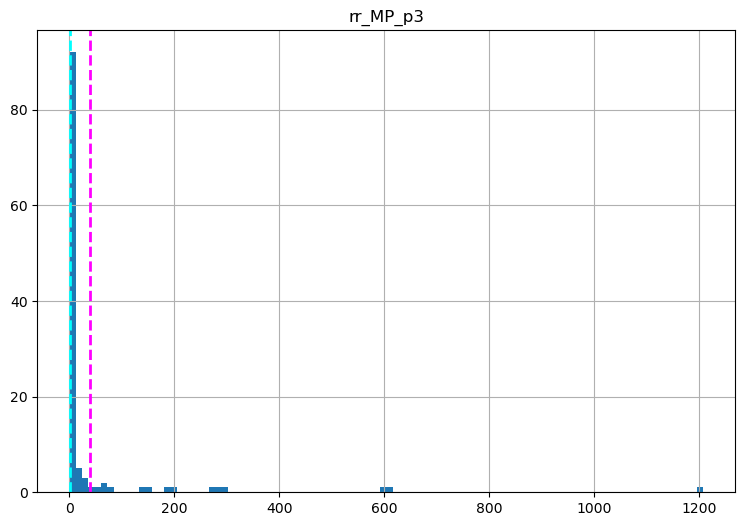

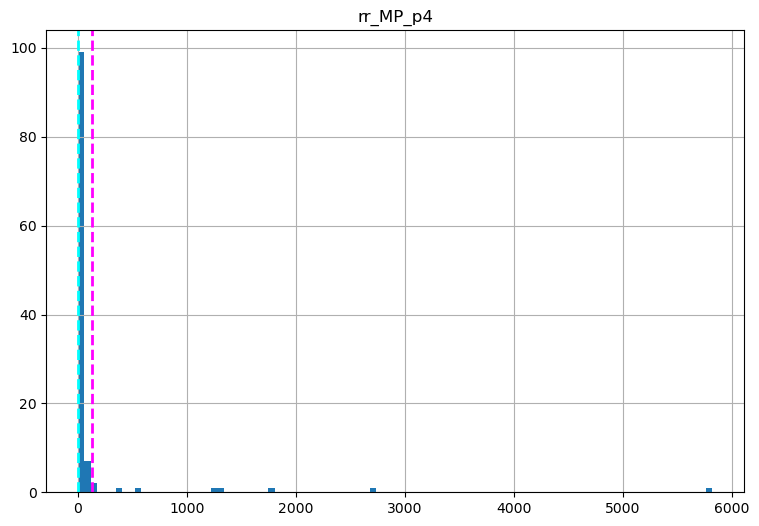

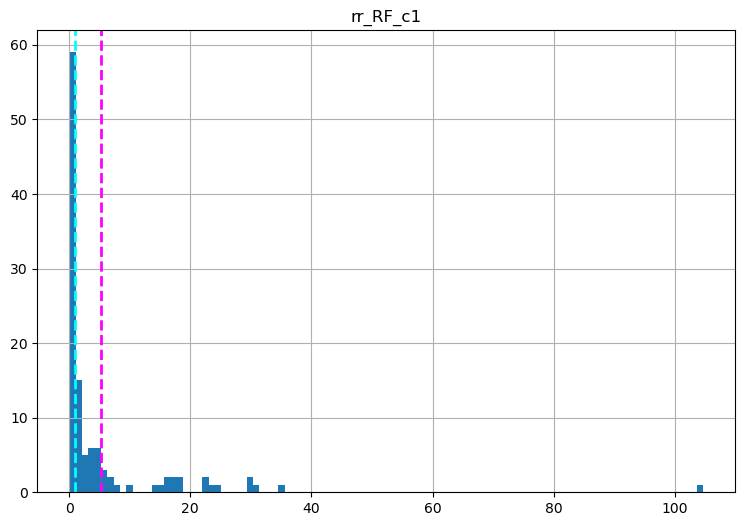

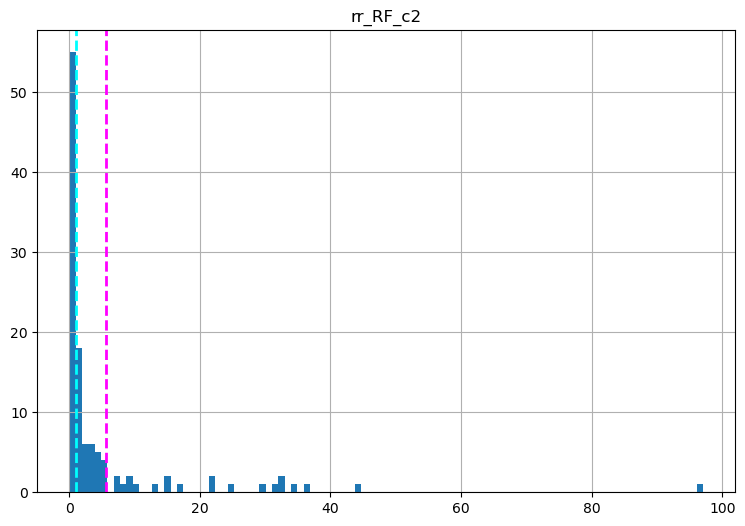

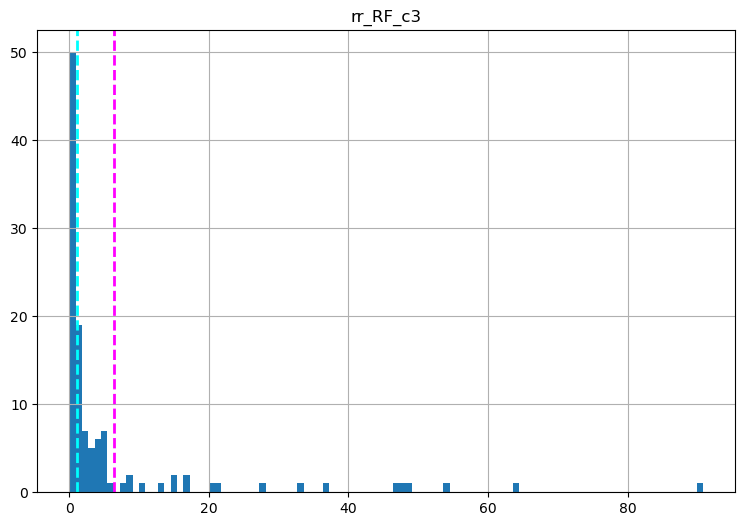

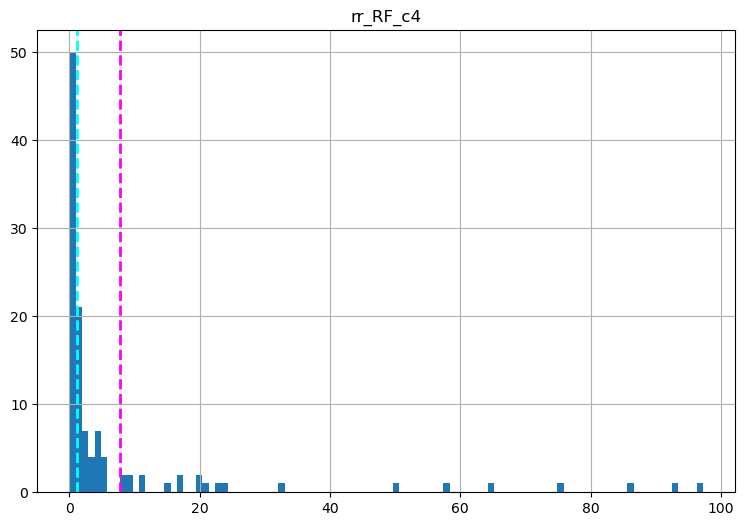

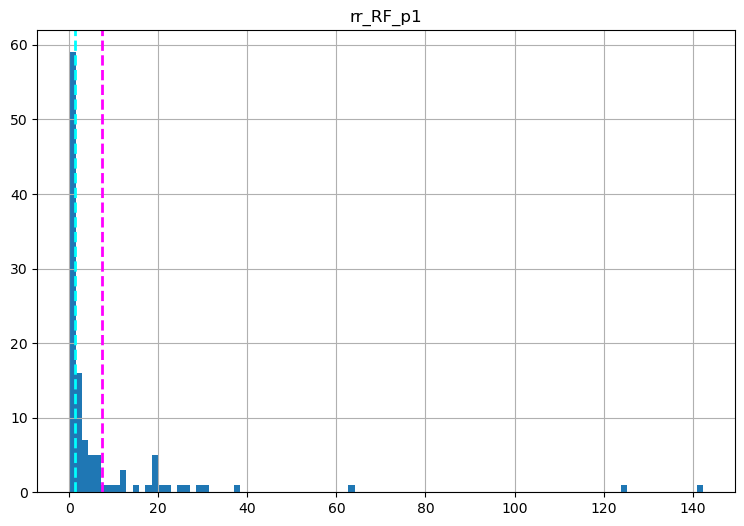

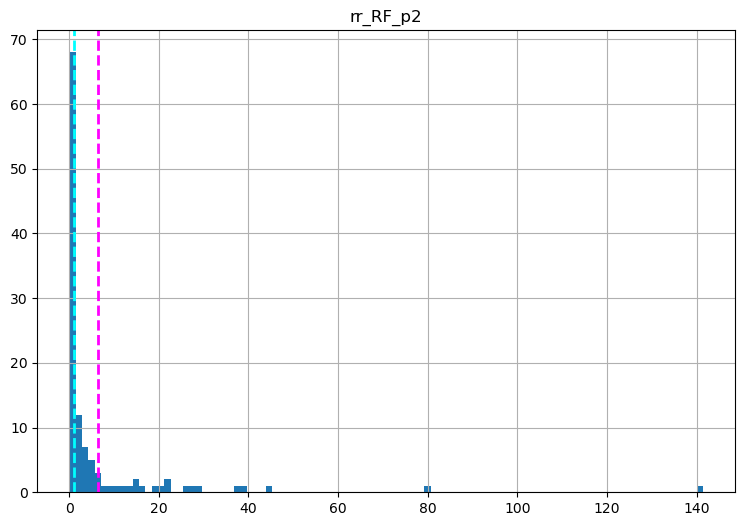

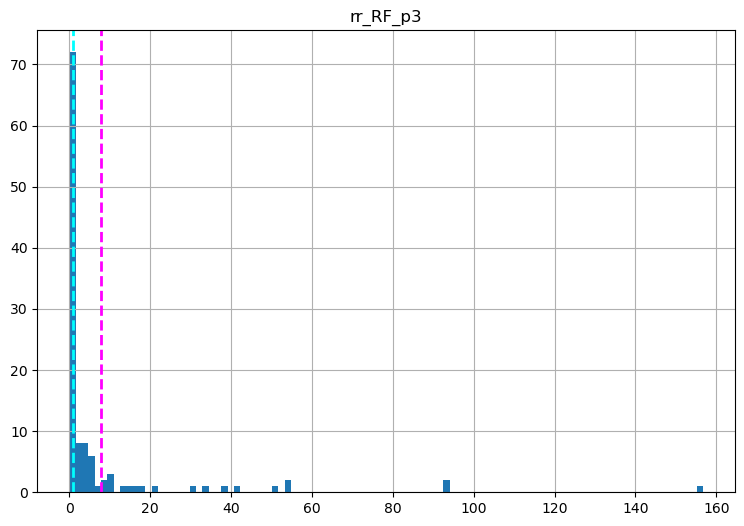

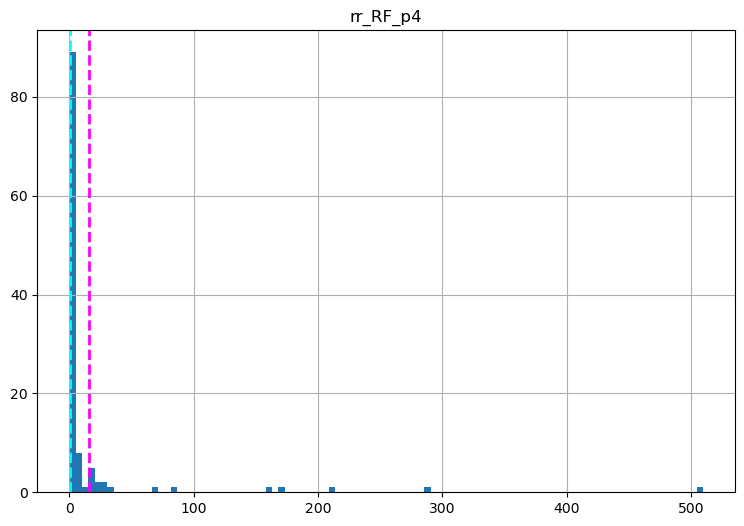

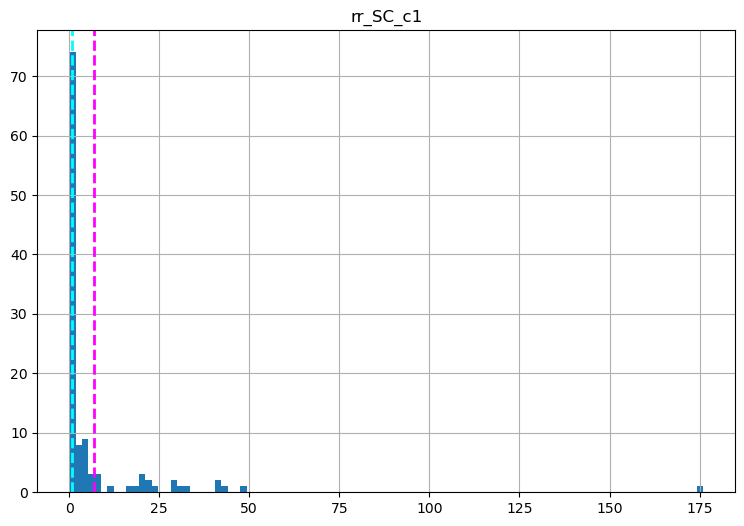

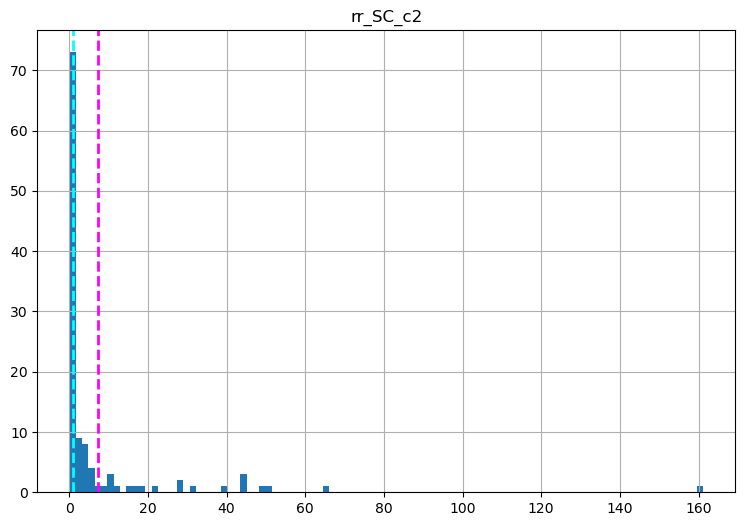

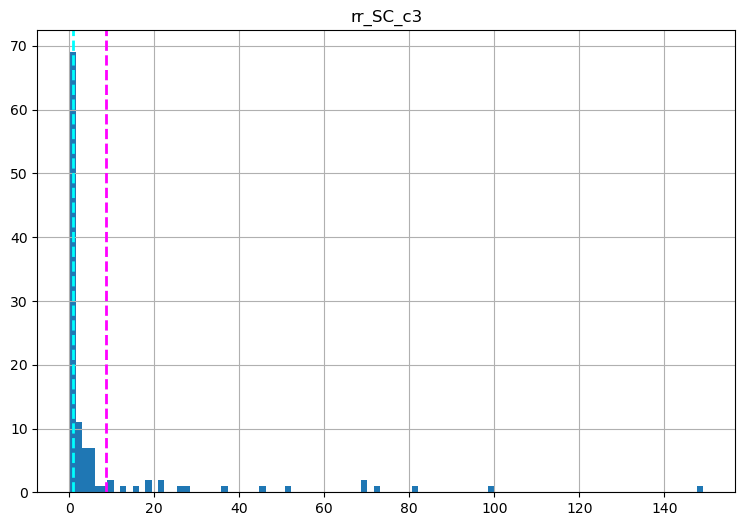

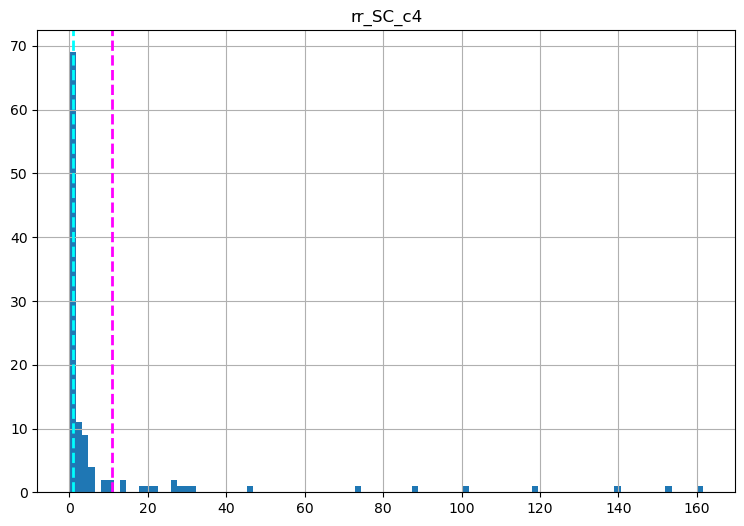

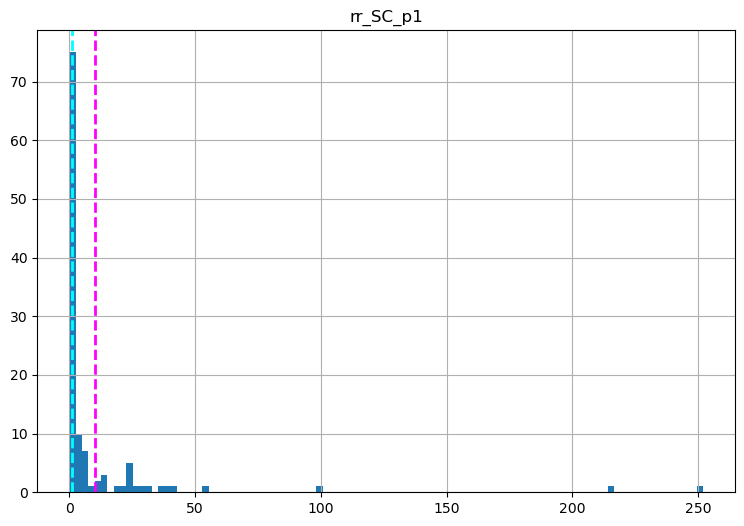

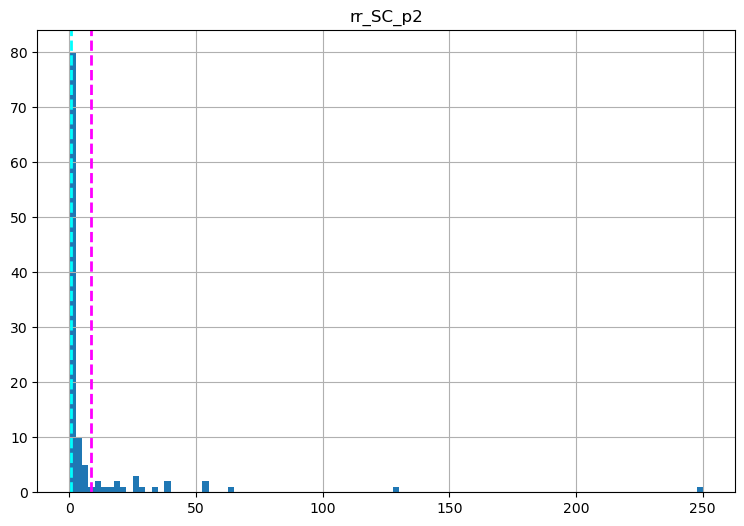

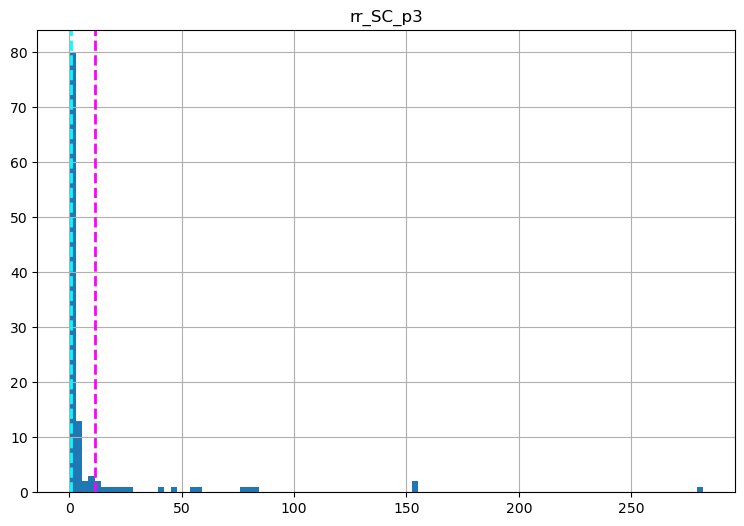

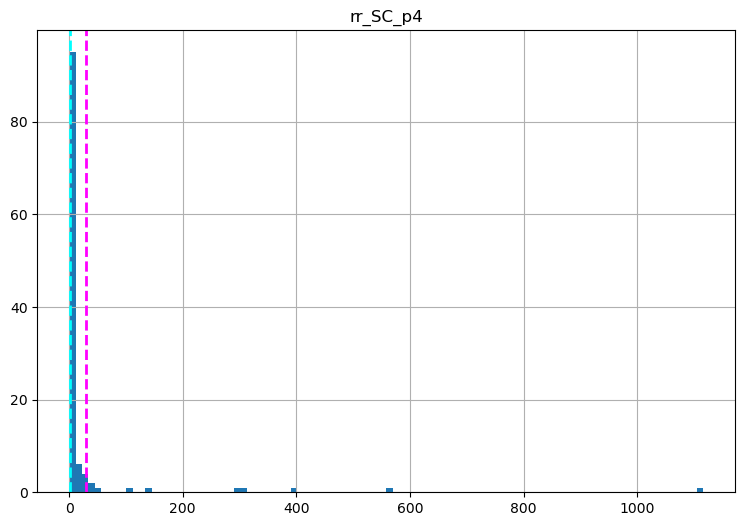

In [9]:
# Plot a histogram for each numeric feature
for col in numeric_features:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    feature = df[col]
    feature.hist(bins=100, ax = ax)
    ax.axvline(feature.mean(), color='magenta', linestyle='dashed', linewidth=2)
    ax.axvline(feature.median(), color='cyan', linestyle='dashed', linewidth=2)
    ax.set_title(col)
plt.show()

ค่า dbz มีการกระจายตัวแบบโค้งระฆังคว่ำ ที่มีค่าเฉลี่ยอยู่ตรงกลาง ในขณะที่ค่าฝนที่ได้จาก zr มีการกระจายตัวของค่าแบบเบ้ไปทางขวา

### histogram ของ rain_intensity ที่เป็นชนิด categorical features

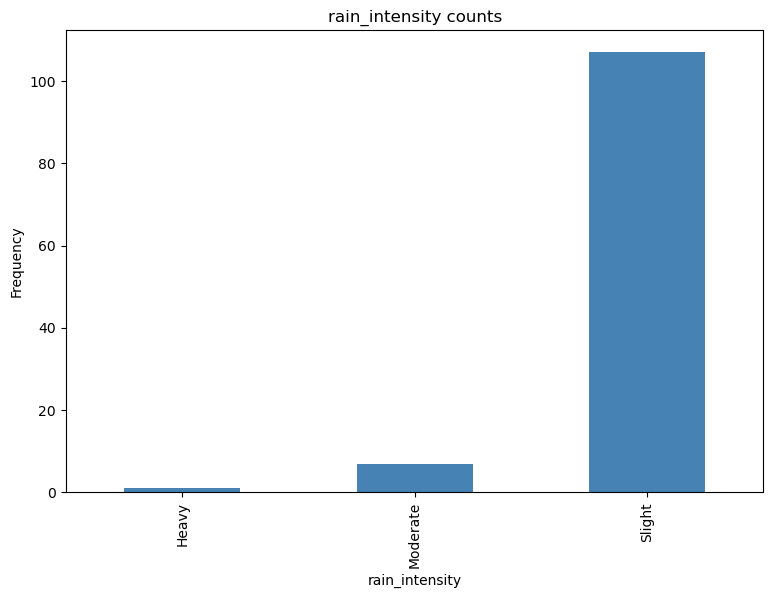

In [10]:
categorical_features = ['rain_intensity']
for col in categorical_features:
    counts = df[col].value_counts().sort_index()
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    counts.plot.bar(ax = ax, color='steelblue')
    ax.set_title(col + ' counts')
    ax.set_xlabel(col) 
    ax.set_ylabel("Frequency")
plt.show()

ฝนอ่อนมีจำนวนความถี่มากสุด ในขณะที่ฝนหนักมีน้อยกว่า 10 เรคคอร์ด

### พลอต scatter diagram ระหว่างฟีเจอร์กับฝนสสน.

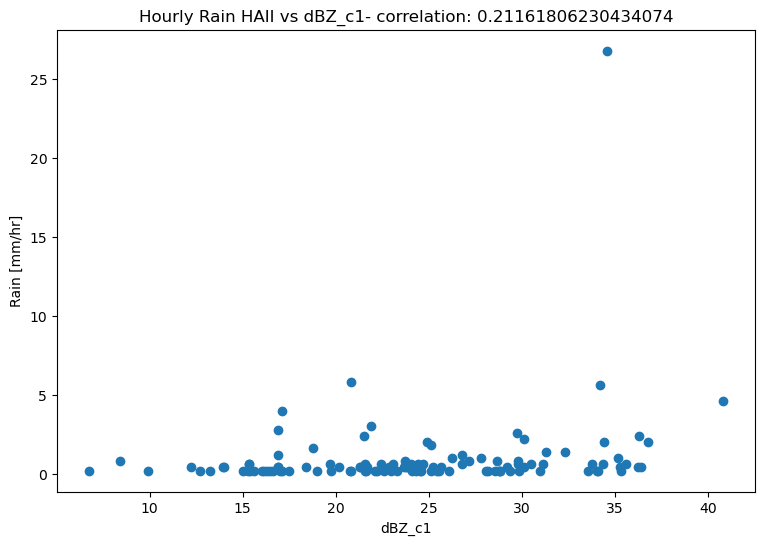

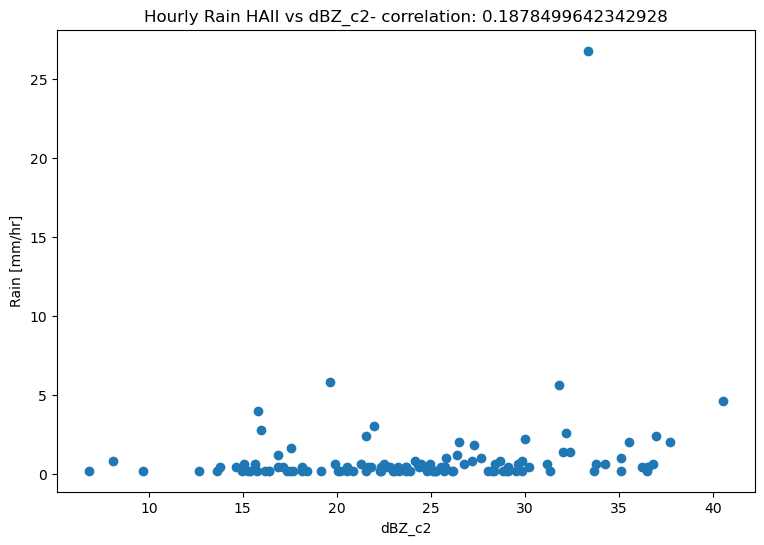

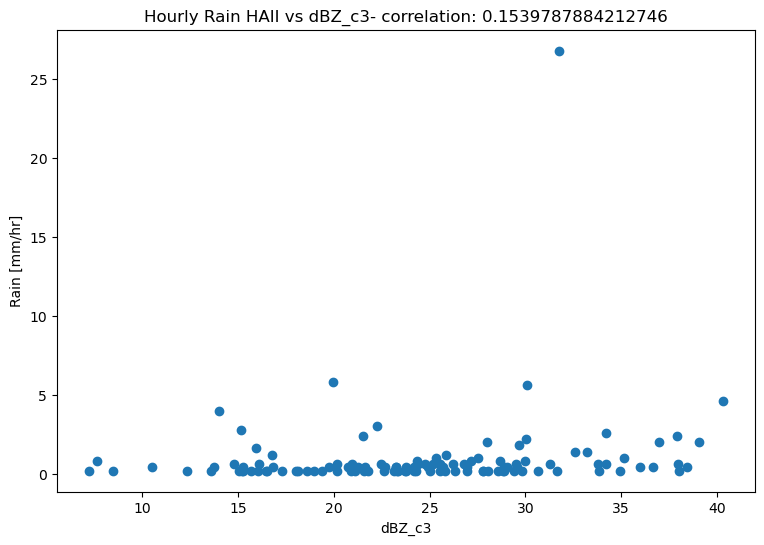

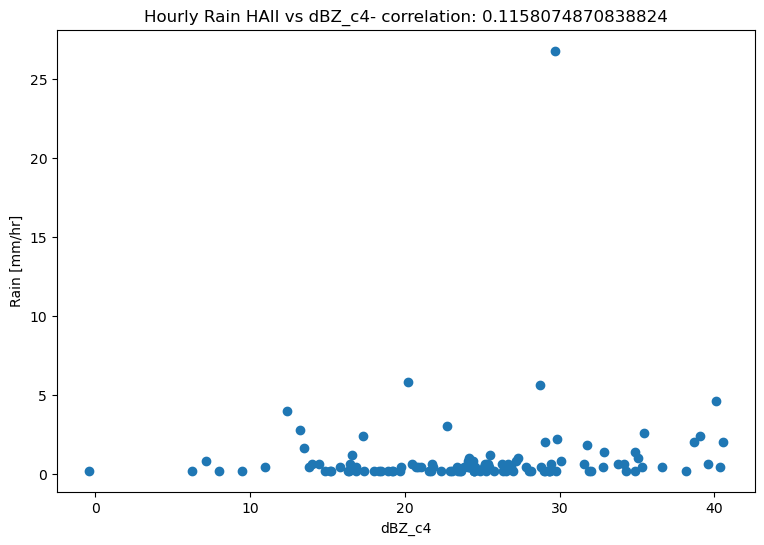

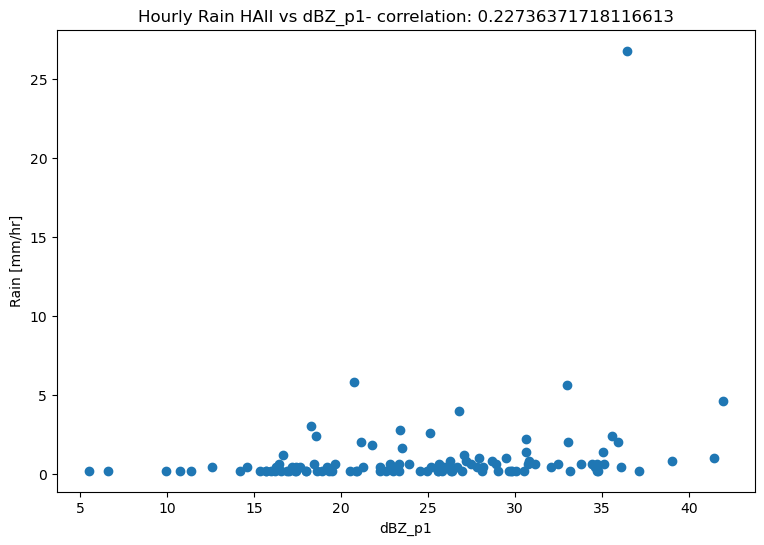

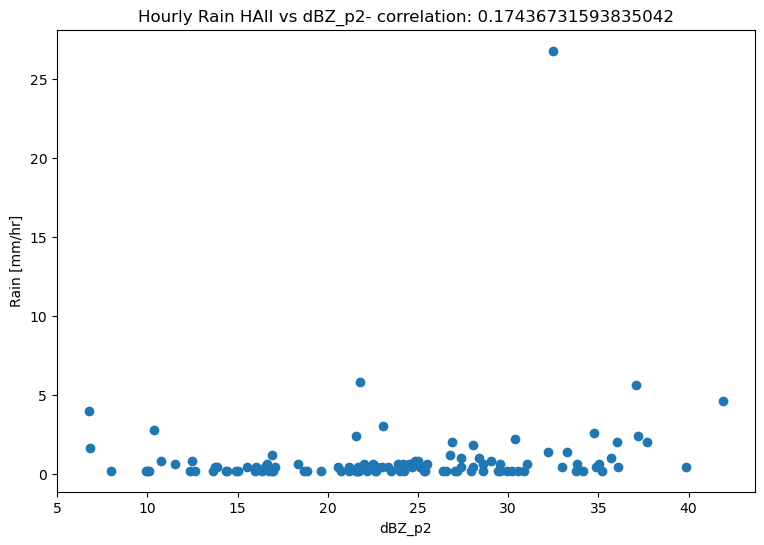

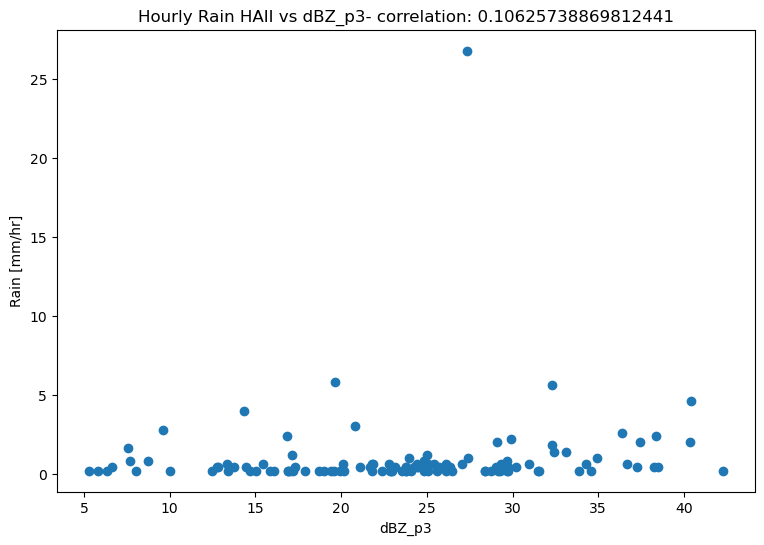

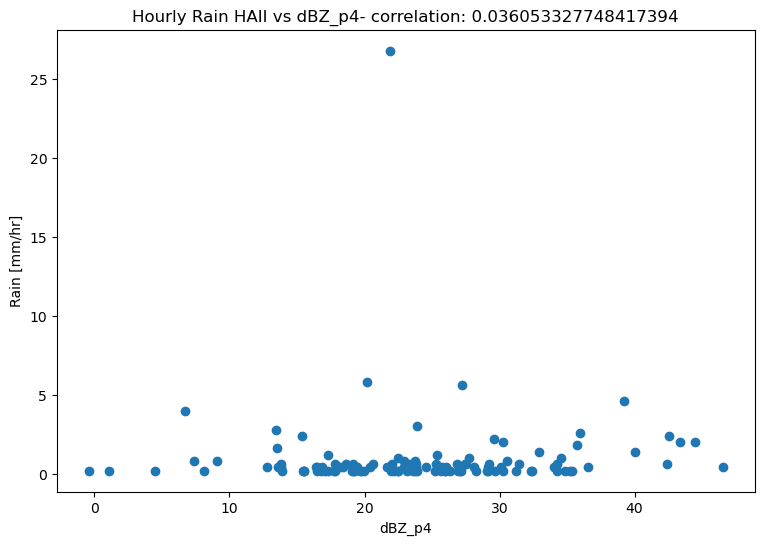

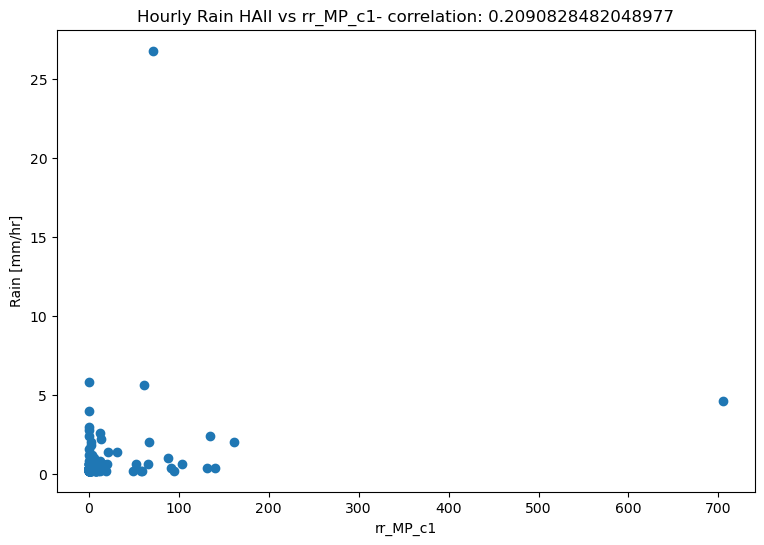

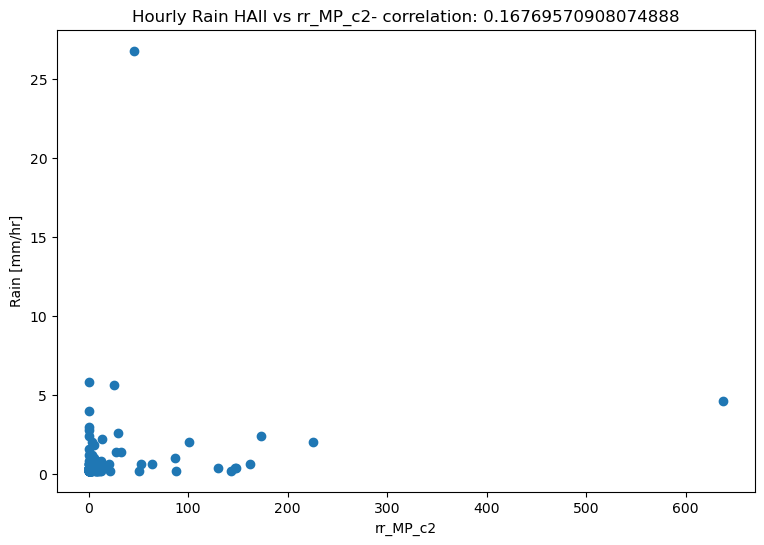

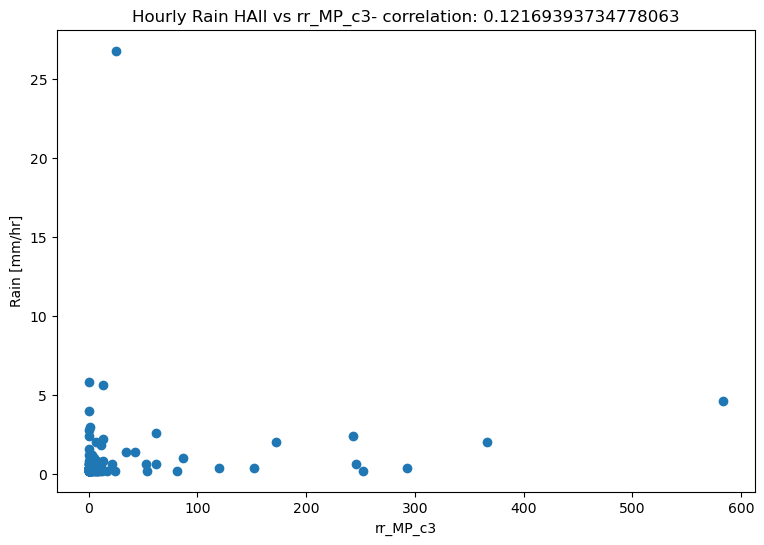

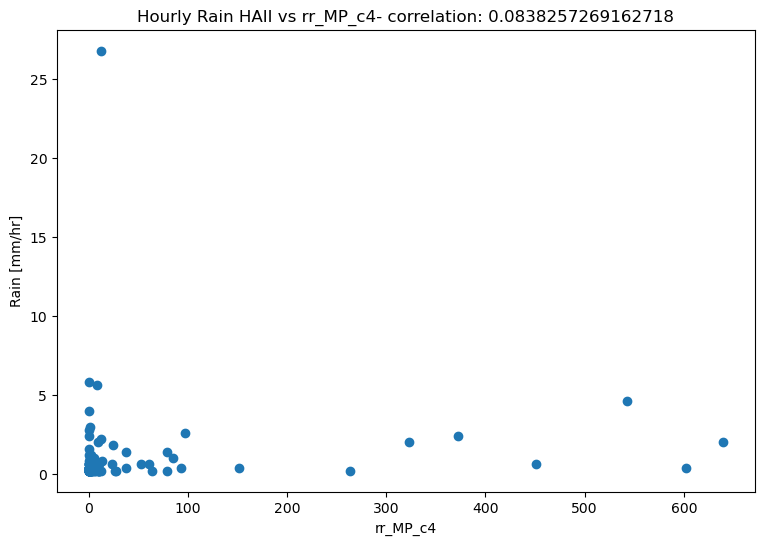

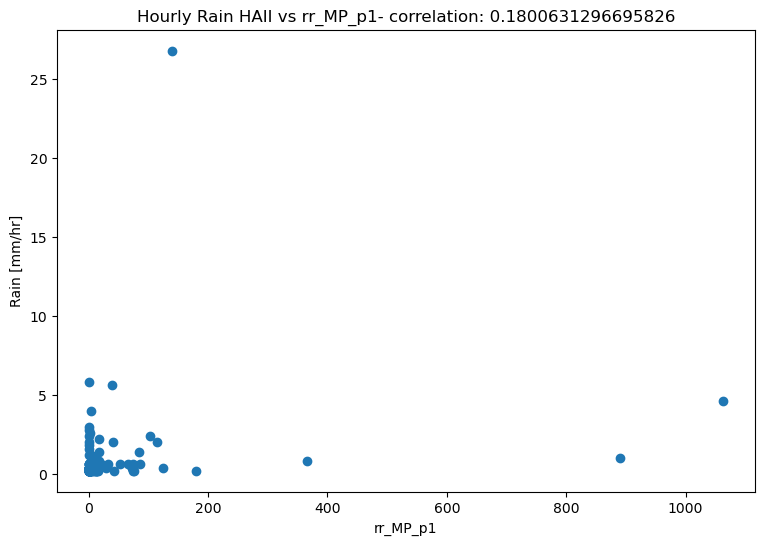

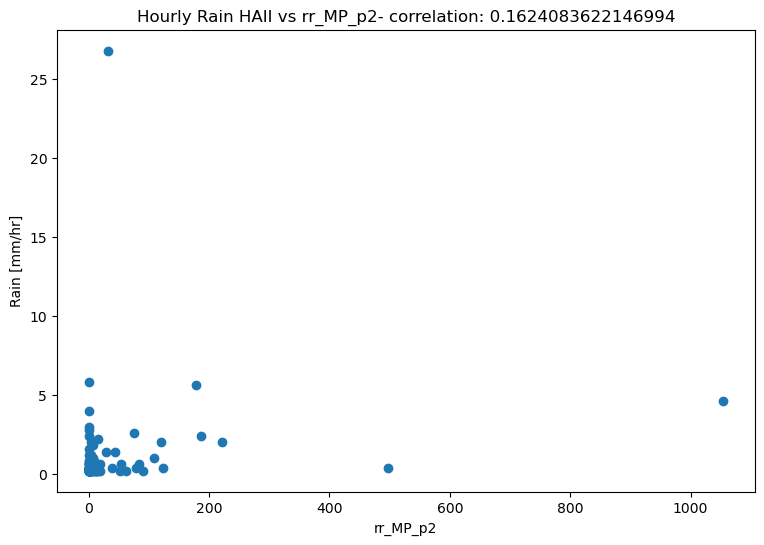

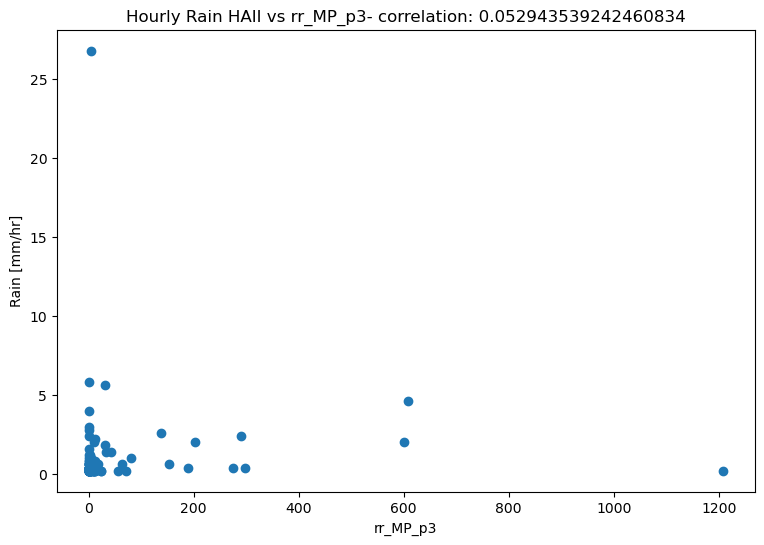

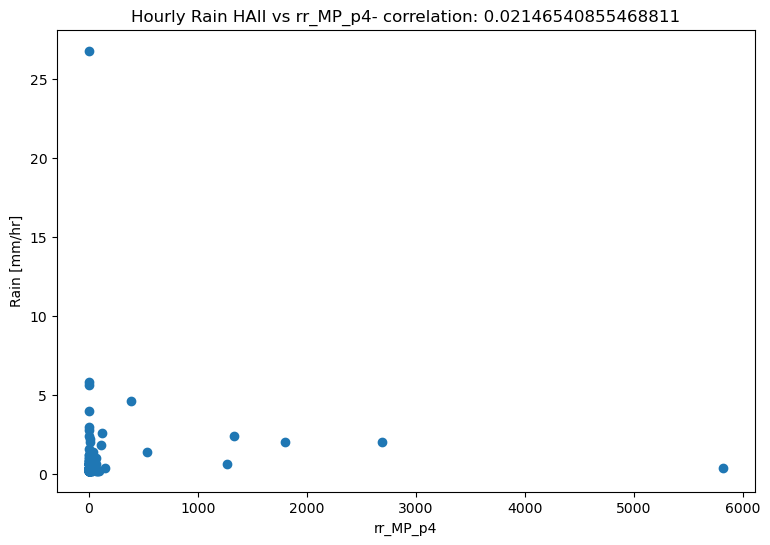

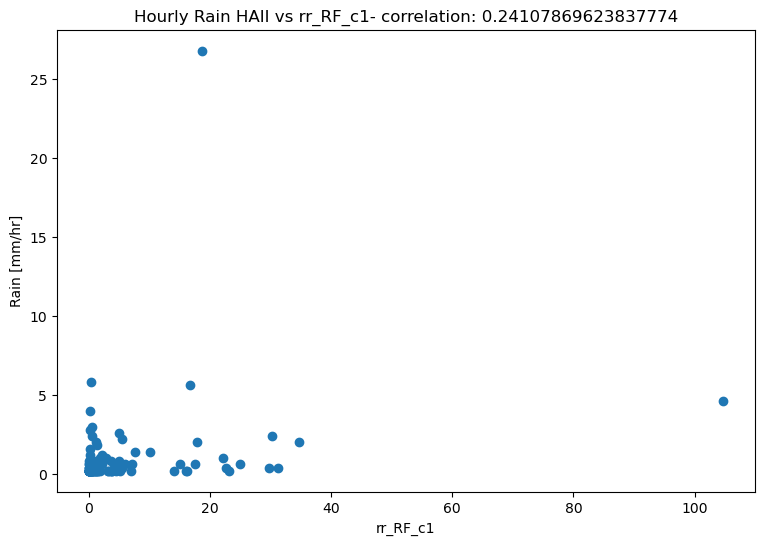

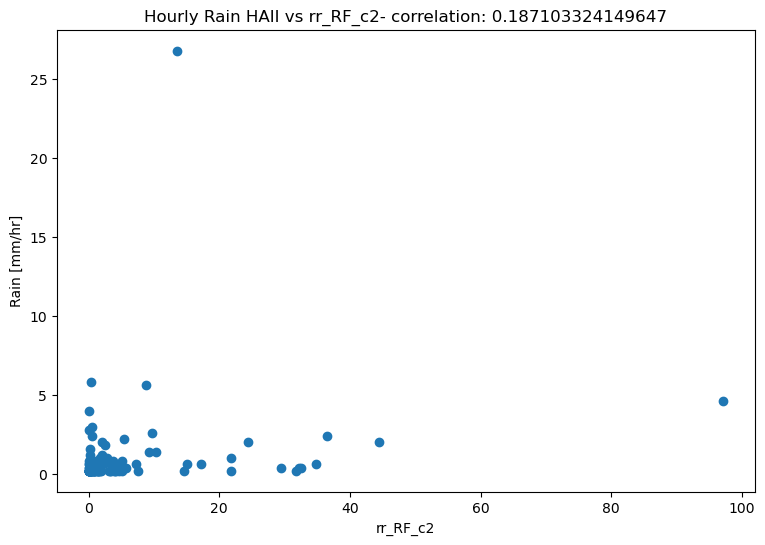

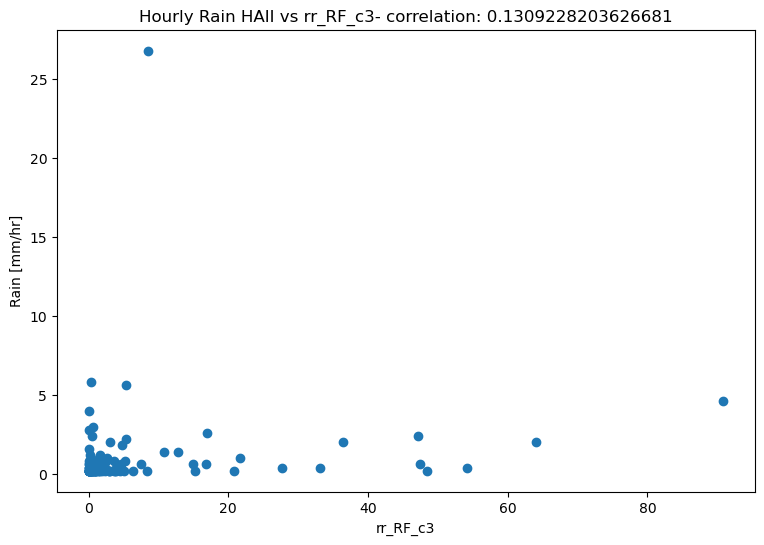

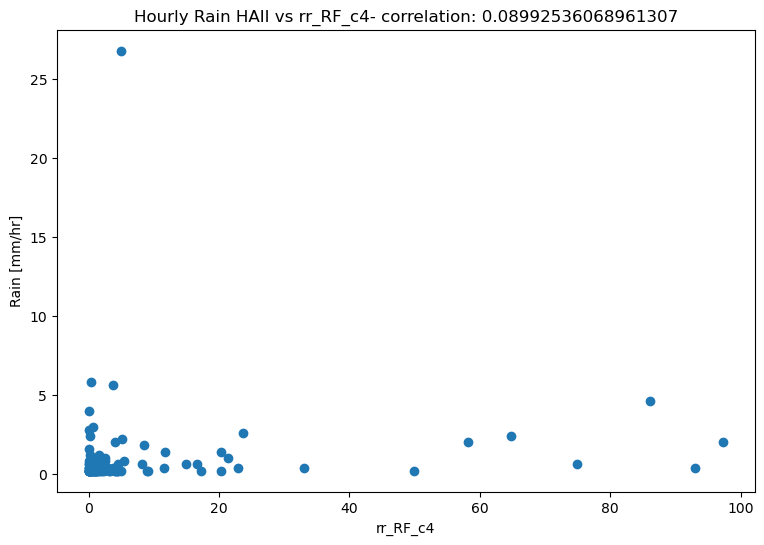

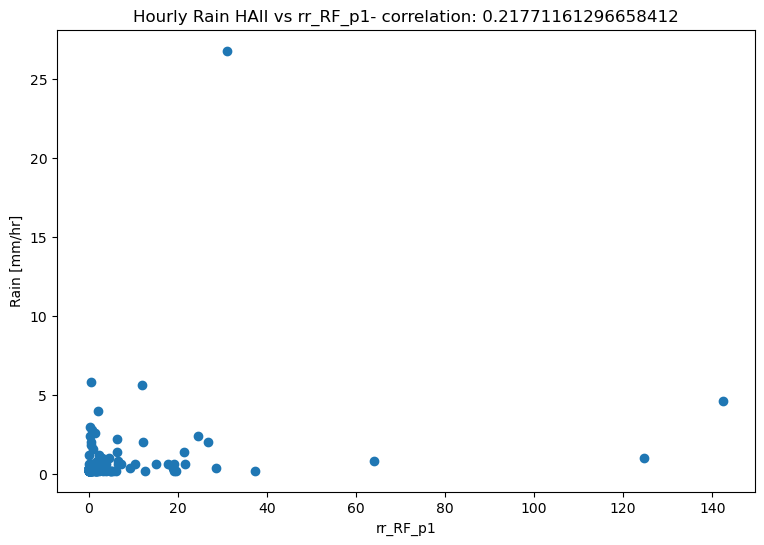

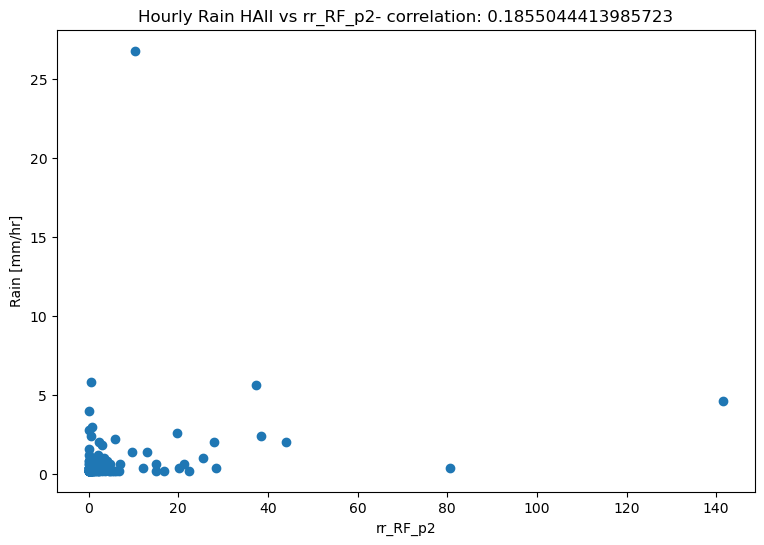

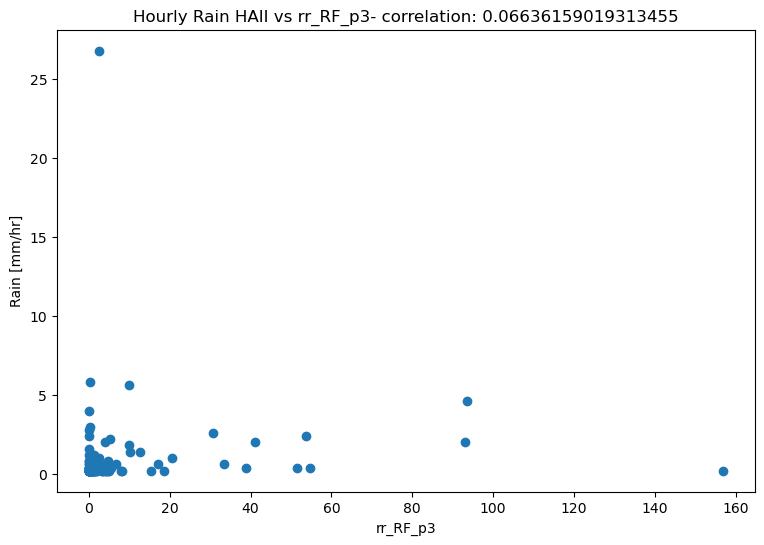

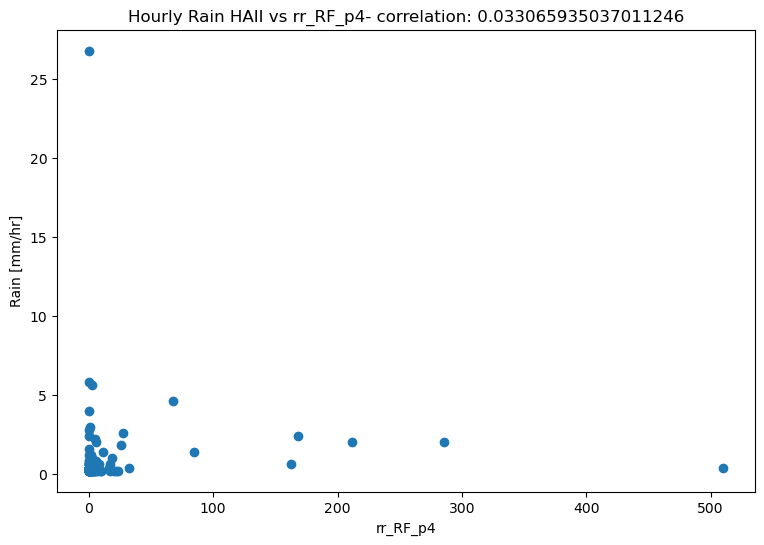

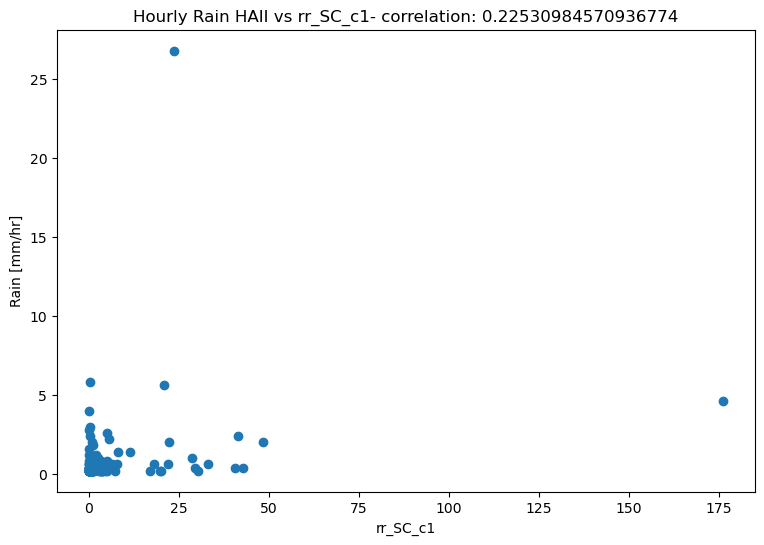

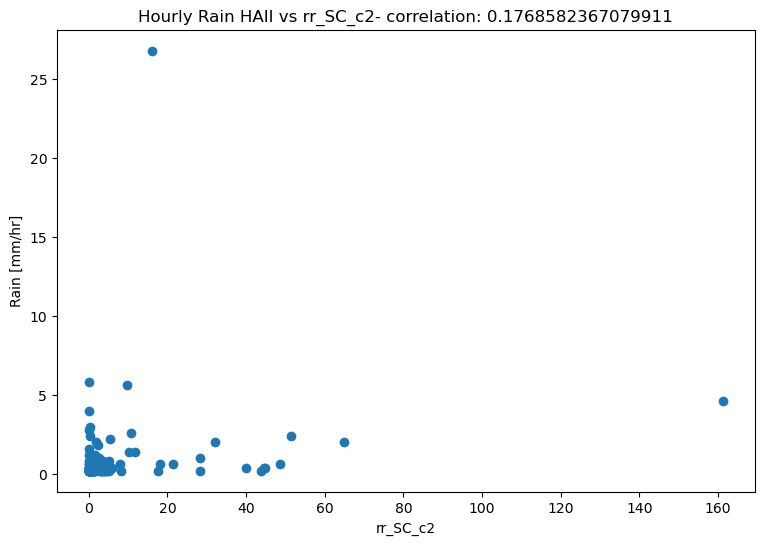

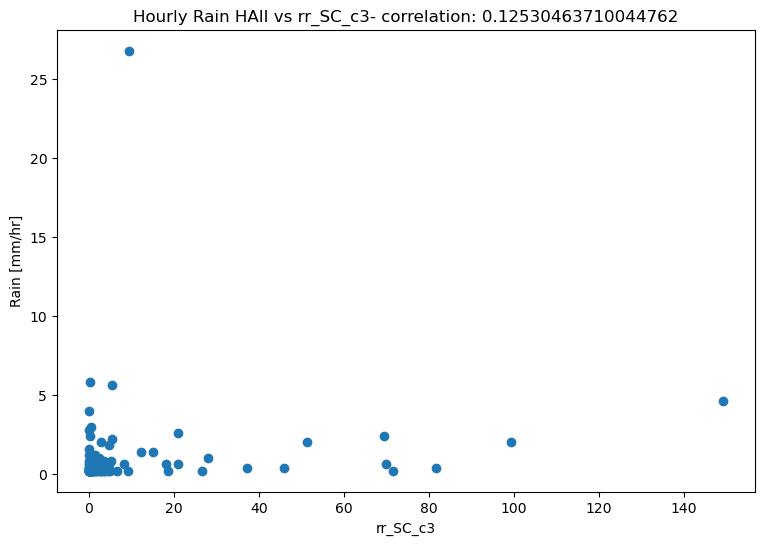

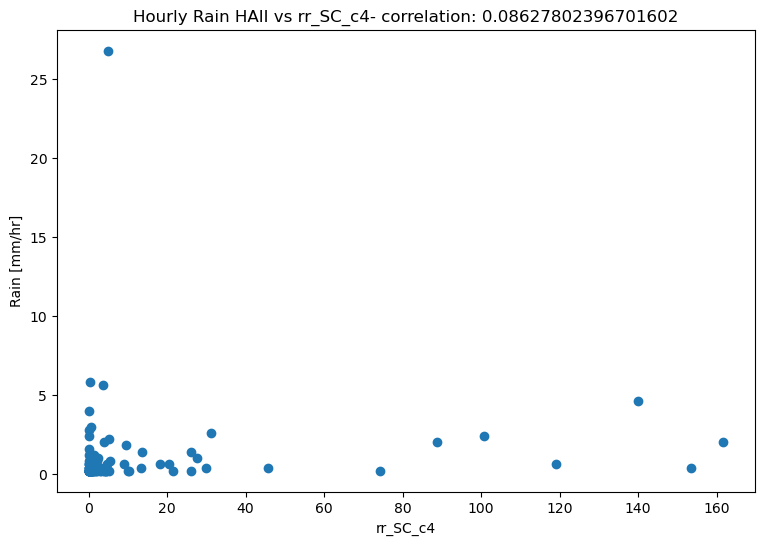

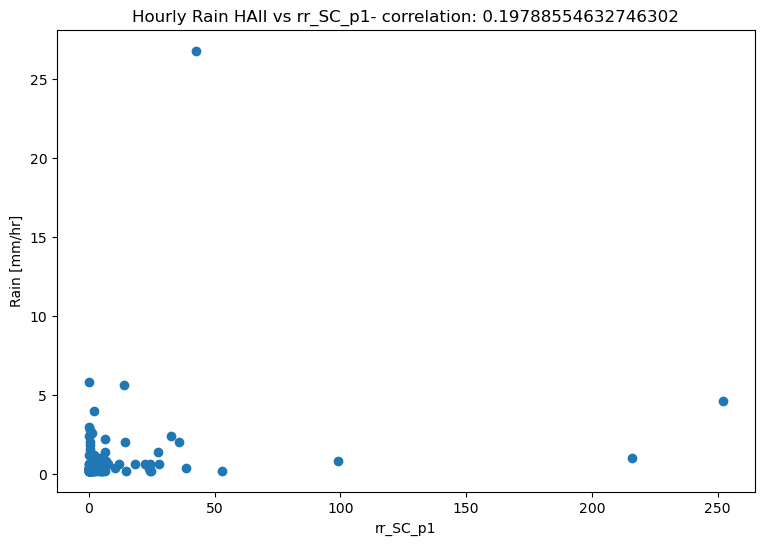

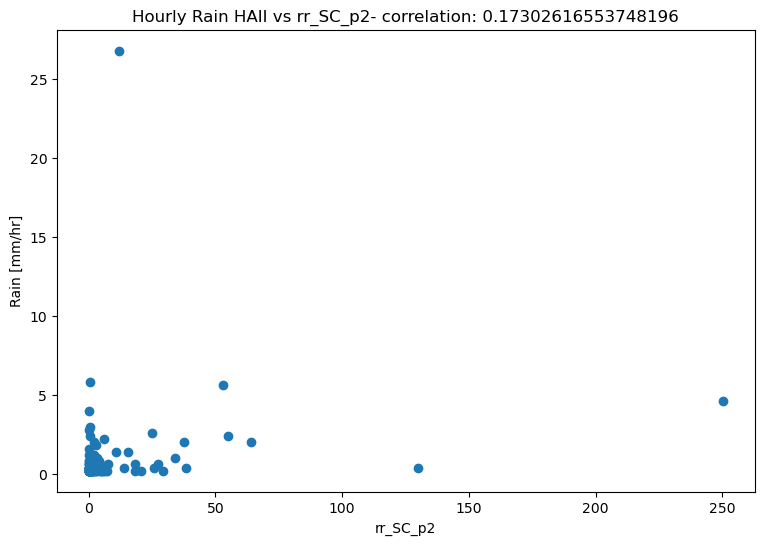

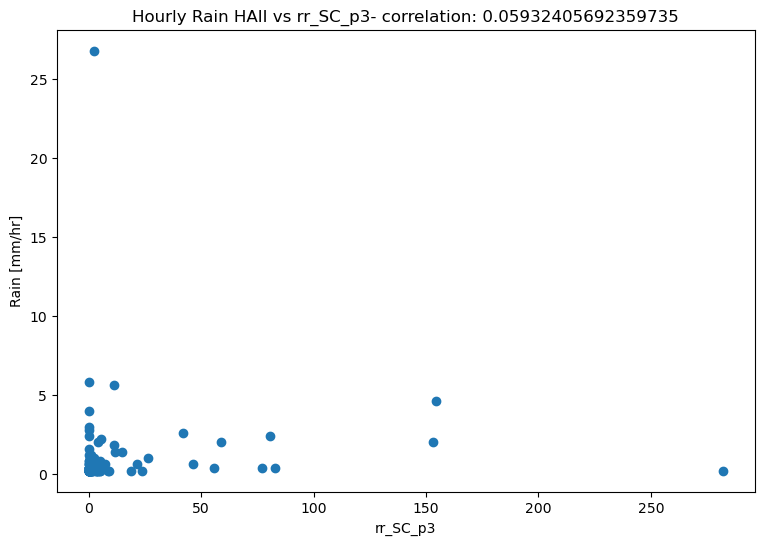

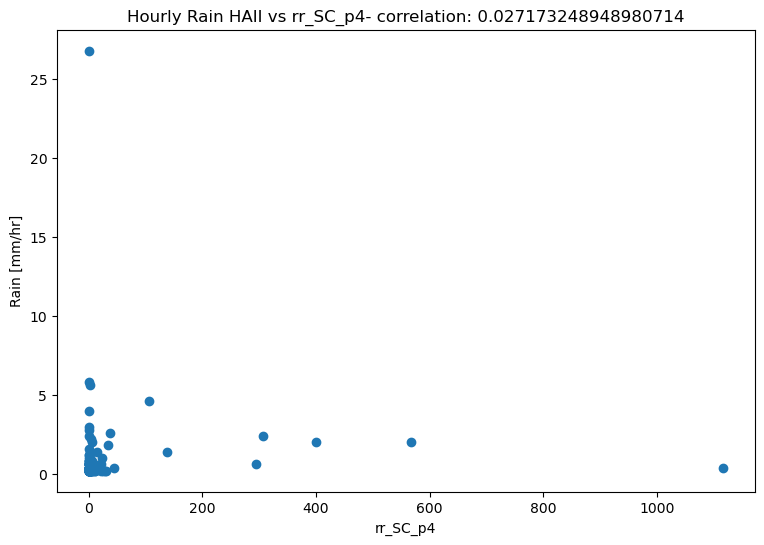

In [11]:
for col in numeric_features:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    feature = df[col]
    label = df['rain_truth']
    correlation = feature.corr(label)
    plt.scatter(x=feature, y=label)
    plt.xlabel(col)
    plt.ylabel('Rain [mm/hr]')
    ax.set_title('Hourly Rain HAII vs ' + col + '- correlation: ' + str(correlation))
plt.show()

ค่าความสัมพันธ์ระหว่างฝนกับตัวแปรอื่น มีความสอดคล้องกันอย่างอ่อน ๆ โดยเฉพาะมุมยกด้านล่าง อย่างไรก็ดีสามารถใช้ pairplot และ correlation matrix ช่วยในการแปลผลได้

### boxplot ของ rain intensity

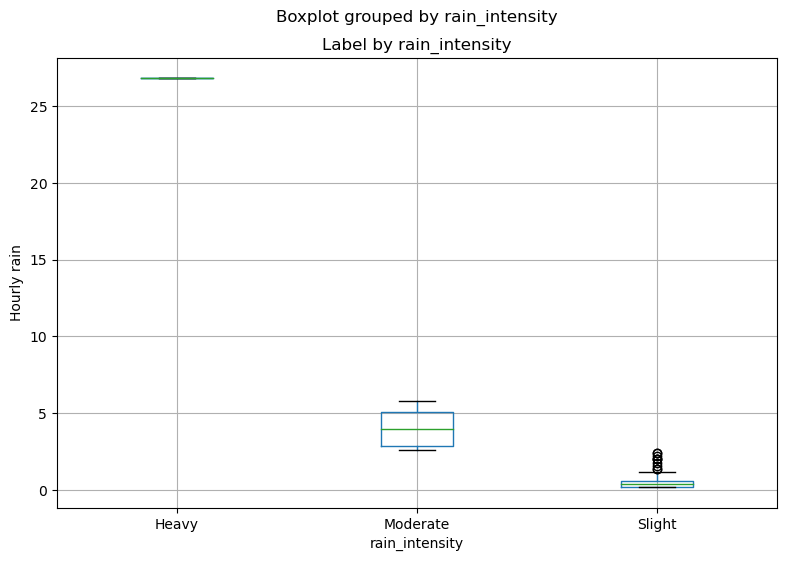

In [12]:
# plot a boxplot for the label by each categorical feature
for col in categorical_features:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    df.boxplot(column = 'rain_truth', by = col, ax = ax)
    ax.set_title('Label by ' + col)
    ax.set_ylabel("Hourly rain")
plt.show()

ฝนอ่อนมีค่ากระจายตัว outlier ค่อนข้างมาก ส่วน moderate มีค่าที่ค่อนข้างเกาะกลุ่ม ในขณะที่ฝนหนักมีข้อมูลน้อยเกินไป

## Train a Regression Model

###  linear regression

In [13]:
df.columns

Index(['dBZ_c1', 'dBZ_c2', 'dBZ_c3', 'dBZ_c4', 'dBZ_p1', 'dBZ_p2', 'dBZ_p3',
       'dBZ_p4', 'rain_intensity', 'rr_MP_c1', 'rr_MP_c2', 'rr_MP_c3',
       'rr_MP_c4', 'rr_MP_p1', 'rr_MP_p2', 'rr_MP_p3', 'rr_MP_p4', 'rr_RF_c1',
       'rr_RF_c2', 'rr_RF_c3', 'rr_RF_c4', 'rr_RF_p1', 'rr_RF_p2', 'rr_RF_p3',
       'rr_RF_p4', 'rr_SC_c1', 'rr_SC_c2', 'rr_SC_c3', 'rr_SC_c4', 'rr_SC_p1',
       'rr_SC_p2', 'rr_SC_p3', 'rr_SC_p4', 'rain_truth'],
      dtype='object')

In [14]:
# Step 2: Defining the columns and reading the DataFrame 
TargetVariable=['rain_truth']
#Predictors=['dBZ_c1', 'dBZ_c2', 'dBZ_c3', 'dBZ_c4', 'dBZ_p1', 'dBZ_p2', 'dBZ_p3', 'dBZ_p4', 
#            'rr_MP_c1', 'rr_MP_c2', 'rr_MP_c3', 'rr_MP_c4', 'rr_MP_p1', 'rr_MP_p2', 'rr_MP_p3', 'rr_MP_p4', 
#            'rr_RF_c1', 'rr_RF_c2', 'rr_RF_c3', 'rr_RF_c4', 'rr_RF_p1', 'rr_RF_p2', 'rr_RF_p3','rr_RF_p4', 
#            'rr_SC_c1', 'rr_SC_c2', 'rr_SC_c3', 'rr_SC_c4', 'rr_SC_p1', 'rr_SC_p2', 'rr_SC_p3', 'rr_SC_p4'] # แบบจำลองไม่ดี 

#Predictors=['dBZ_c1', 'dBZ_c2', 'dBZ_p1', 'dBZ_p2',  
#            'rr_MP_c1', 'rr_MP_c2', 'rr_MP_p1', 'rr_MP_p2',
#            'rr_RF_c1', 'rr_RF_c2', 'rr_RF_p1', 'rr_RF_p2',
#            'rr_SC_c1', 'rr_SC_c2', 'rr_SC_p1', 'rr_SC_p2']  # แบบจำลองไม่ดี 

Predictors=['dBZ_c1', 'dBZ_c2', 'dBZ_c3', 'dBZ_c4'] # แบบจำลองดี
#Predictors=['dBZ_p1', 'dBZ_p2', 'dBZ_p3', 'dBZ_p4'] # แบบจำลองไม่ดีน้อยกว่า cappi ล้วน
#Predictors=['dBZ_c1', 'dBZ_c2','dBZ_p1', 'dBZ_p2'] # แบบจำลองค่อนข้างดี 
#Predictors=['rr_RF_c1', 'rr_RF_c2', 'rr_RF_c3', 'rr_RF_c4', 'rr_RF_p1', 'rr_RF_p2', 'rr_RF_p3','rr_RF_p4'] # แบบจำลองไม่ดี 
#Predictors=['dBZ_c1', 'dBZ_p1'] 

# Step 3: Seperating the data into features and labels
X=df[Predictors].values
y=df[TargetVariable].values

In [15]:
# ปรับ scale ข้อมูล
from sklearn.preprocessing import StandardScaler
#scaler = StandardScaler()
# fit and transform the data
#X = scaler.fit_transform(X)


In [16]:
# แยกข้อมูล
from sklearn.model_selection import train_test_split

# Split data 70%-30% into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=0)
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

print ('Training Set: %d rows\nTest Set: %d rows' % (X_train.shape[0], X_test.shape[0]))

Training Set: 80 rows
Test Set: 35 rows


In [17]:
# เทรน model
from sklearn.linear_model import LinearRegression

# Fit a linear regression model on the training set
model = LinearRegression().fit(X_train, y_train)
print (model)

LinearRegression()


In [18]:
# ประเมินแบบจำลอง
import numpy as np

predictions = model.predict(X_test)
np.set_printoptions(suppress=True)
print('Predicted labels: ', np.round(predictions)[:10])
print('Actual labels   : ' ,y_test[:10])

Predicted labels:  [[0.]
 [1.]
 [2.]
 [2.]
 [2.]
 [1.]
 [1.]
 [1.]
 [0.]
 [0.]]
Actual labels   :  [[0.2]
 [0.2]
 [2.4]
 [1. ]
 [0.6]
 [0.4]
 [0.2]
 [0.4]
 [0.2]
 [0.2]]


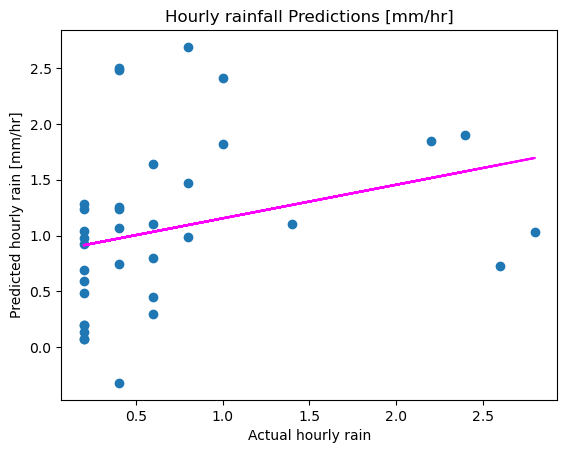

In [19]:
import matplotlib.pyplot as plt

%matplotlib inline

plt.scatter(y_test, predictions)
plt.xlabel('Actual hourly rain')
plt.ylabel('Predicted hourly rain [mm/hr]')
plt.title('Hourly rainfall Predictions [mm/hr]')
# overlay the regression line
z = np.polyfit(y_test.flatten(), predictions.flatten(), 1)
p = np.poly1d(z)
plt.plot(y_test,p(y_test), color='magenta')
plt.show()

แบบจำลองที่ได้ยังไม่ดีหากใส่ตัวแปรทั้งหมด เพราะยังขาดหลายกระบวนการ เช่น การทำให้เป็น scale เดียวกัน การหา feature important หรือการเลือกแบบจำลอง

### การวัดประสิทธิภาพแบบจำลองด้วย metric

In [20]:
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, predictions)
print("MSE:", mse)

rmse = np.sqrt(mse)
print("RMSE:", rmse)

r2 = r2_score(y_test, predictions)
print("R2:", r2)

MSE: 0.8912220170804983
RMSE: 0.9440455587949653
R2: -0.7536413693838515


เมื่อนำตัวแปรทั้งหมดใส่ในแบบจำลอง จะพบว่าค่า metric สูงมาก แสดงว่าแบบจำลองไม่ fit ในขณะที่ถ้าเปลี่ยนเป็น cappi อย่างเดียว แบบจำลองดีขึ้นมาก

## ทดสอบหลายๆอัลกอริทึ่ม

### Linear Algorithm  Lasso 

Lasso() 

MSE: 0.7915841549486095
RMSE: 0.8897101522117242
R2: -0.5575857585004607


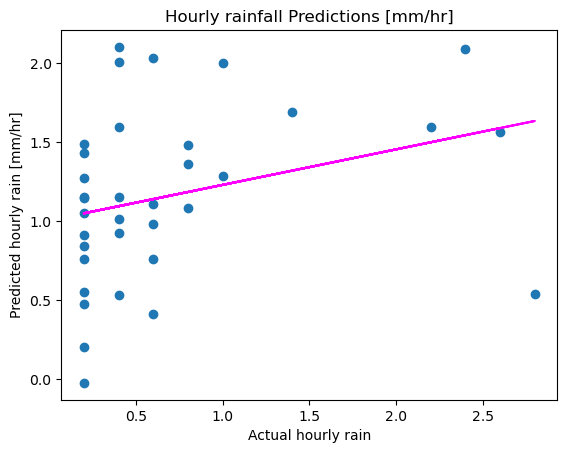

In [21]:
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler

# Fit a lasso model on the training set
model = Lasso().fit(X_train, y_train)
print (model, "\n")

# Evaluate the model using the test data
predictions = model.predict(X_test)
mse = mean_squared_error(y_test, predictions)
print("MSE:", mse)
rmse = np.sqrt(mse)
print("RMSE:", rmse)
r2 = r2_score(y_test, predictions)
print("R2:", r2)

# Plot predicted vs actual
plt.scatter(y_test, predictions)
plt.xlabel('Actual hourly rain')
plt.ylabel('Predicted hourly rain [mm/hr]')
plt.title('Hourly rainfall Predictions [mm/hr]')
# overlay the regression line
z = np.polyfit(y_test.flatten(), predictions.flatten(), 1)
p = np.poly1d(z)
plt.plot(y_test,p(y_test), color='magenta')
plt.show()

### Decision Tree Algorithm

In [22]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import export_text

# Train the model
model = DecisionTreeRegressor().fit(X_train, y_train)
print (model, "\n")

# Visualize the model tree
tree = export_text(model)
print(tree)

DecisionTreeRegressor() 

|--- feature_0 <= 34.50
|   |--- feature_0 <= 34.14
|   |   |--- feature_0 <= 16.92
|   |   |   |--- feature_2 <= 12.05
|   |   |   |   |--- feature_0 <= 7.57
|   |   |   |   |   |--- value: [0.20]
|   |   |   |   |--- feature_0 >  7.57
|   |   |   |   |   |--- feature_1 <= 12.63
|   |   |   |   |   |   |--- value: [0.80]
|   |   |   |   |   |--- feature_1 >  12.63
|   |   |   |   |   |   |--- value: [0.40]
|   |   |   |--- feature_2 >  12.05
|   |   |   |   |--- feature_0 <= 15.37
|   |   |   |   |   |--- feature_1 <= 15.53
|   |   |   |   |   |   |--- feature_0 <= 14.52
|   |   |   |   |   |   |   |--- feature_1 <= 13.72
|   |   |   |   |   |   |   |   |--- value: [0.20]
|   |   |   |   |   |   |   |--- feature_1 >  13.72
|   |   |   |   |   |   |   |   |--- value: [0.40]
|   |   |   |   |   |   |--- feature_0 >  14.52
|   |   |   |   |   |   |   |--- value: [0.20]
|   |   |   |   |   |--- feature_1 >  15.53
|   |   |   |   |   |   |--- value: [0.60]
|   |  

MSE: 1.4308571428571428
RMSE: 1.196184410054379
R2: -1.8154716011308154


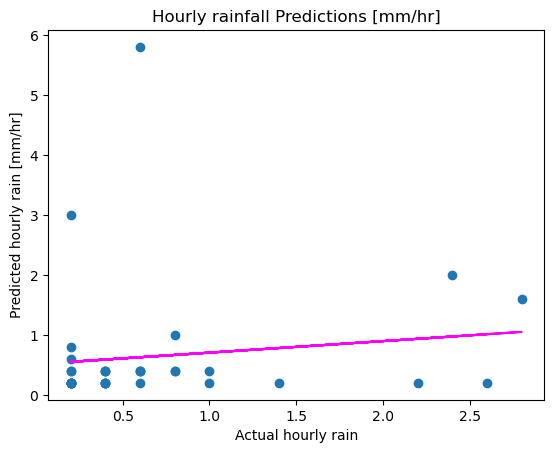

In [23]:
# Evaluate the model using the test data
predictions = model.predict(X_test)
mse = mean_squared_error(y_test, predictions)
print("MSE:", mse)
rmse = np.sqrt(mse)
print("RMSE:", rmse)
r2 = r2_score(y_test, predictions)
print("R2:", r2)

# Plot predicted vs actual
plt.scatter(y_test, predictions)
plt.xlabel('Actual hourly rain')
plt.ylabel('Predicted hourly rain [mm/hr]')
plt.title('Hourly rainfall Predictions [mm/hr]')
# overlay the regression line
z = np.polyfit(y_test.flatten(), predictions.flatten(), 1)
p = np.poly1d(z)
plt.plot(y_test,p(y_test), color='magenta')
plt.show()

### Ensemble Algorithm : Random Forest model

RandomForestRegressor() 

MSE: 0.9074173714285717
RMSE: 0.95258457442296
R2: -0.7855086738627612


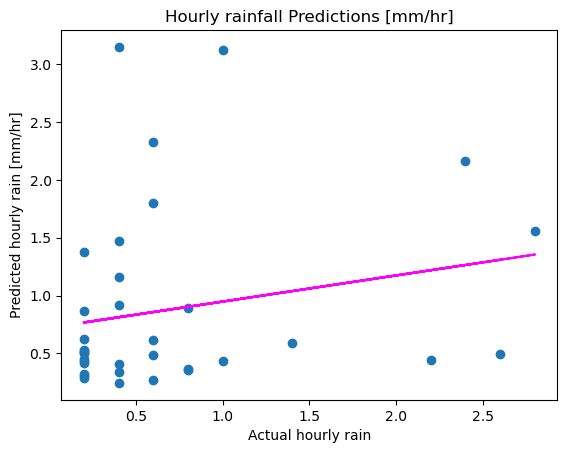

In [24]:
from sklearn.ensemble import RandomForestRegressor

# Train the model
model = RandomForestRegressor().fit(X_train, y_train)
print (model, "\n")

# Evaluate the model using the test data
predictions = model.predict(X_test)
mse = mean_squared_error(y_test, predictions)
print("MSE:", mse)
rmse = np.sqrt(mse)
print("RMSE:", rmse)
r2 = r2_score(y_test, predictions)
print("R2:", r2)

# Plot predicted vs actual
plt.scatter(y_test, predictions)
plt.xlabel('Actual hourly rain')
plt.ylabel('Predicted hourly rain [mm/hr]')
plt.title('Hourly rainfall Predictions [mm/hr]')
# overlay the regression line
z = np.polyfit(y_test.flatten(), predictions.flatten(), 1)
p = np.poly1d(z)
plt.plot(y_test,p(y_test), color='magenta')
plt.show()

### Ensemble Algorithm: GradientBoostingRegressor

GradientBoostingRegressor() 

MSE: 0.44661453418078884
RMSE: 0.66829225207299
R2: 0.12120469613938178


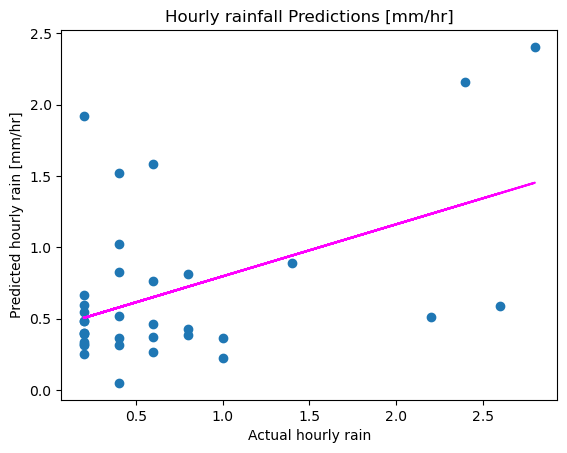

In [25]:
# Train the model
from sklearn.ensemble import GradientBoostingRegressor

# Fit a lasso model on the training set
model = GradientBoostingRegressor().fit(X_train, y_train)
print (model, "\n")

# Evaluate the model using the test data
predictions = model.predict(X_test)
mse = mean_squared_error(y_test, predictions)
print("MSE:", mse)
rmse = np.sqrt(mse)
print("RMSE:", rmse)
r2 = r2_score(y_test, predictions)
print("R2:", r2)

# Plot predicted vs actual
plt.scatter(y_test, predictions)
plt.xlabel('Actual hourly rain')
plt.ylabel('Predicted hourly rain [mm/hr]')
plt.title('Hourly rainfall Predictions [mm/hr]')
# overlay the regression line
z = np.polyfit(y_test.flatten(), predictions.flatten(), 1)
p = np.poly1d(z)
plt.plot(y_test,p(y_test), color='magenta')
plt.show()

## Optimize Hyperparameters

### grid search approach

Best parameter combination: {'learning_rate': 0.5, 'n_estimators': 100} 

GradientBoostingRegressor(learning_rate=0.5) 

MSE: 0.627059206457026
RMSE: 0.7918707005926068
R2: -0.2338530067942961


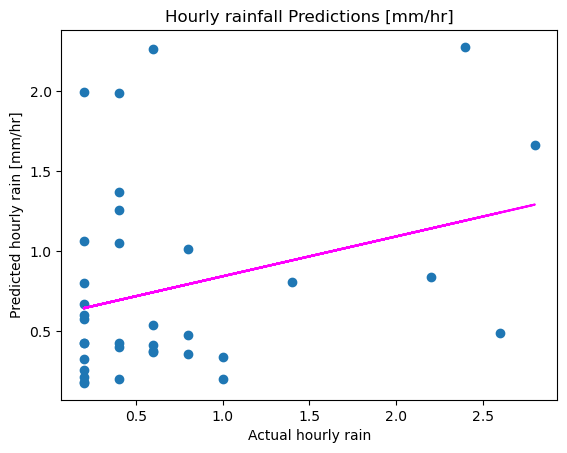

In [26]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, r2_score

# Use a Gradient Boosting algorithm
alg = GradientBoostingRegressor()

# Try these hyperparameter values
params = {
 'learning_rate': [0.1, 0.5, 1.0],
 'n_estimators' : [50, 100, 150]
 }

# Find the best hyperparameter combination to optimize the R2 metric
score = make_scorer(r2_score)
gridsearch = GridSearchCV(alg, params, scoring=score, cv=3, return_train_score=True) # ตรงนี้เลือก K-fold เท่ากับ 3 ครั้ง cv=3
gridsearch.fit(X_train, y_train)
print("Best parameter combination:", gridsearch.best_params_, "\n")

# Get the best model
model=gridsearch.best_estimator_
print(model, "\n")

# Evaluate the model using the test data
predictions = model.predict(X_test)
mse = mean_squared_error(y_test, predictions)
print("MSE:", mse)
rmse = np.sqrt(mse)
print("RMSE:", rmse)
r2 = r2_score(y_test, predictions)
print("R2:", r2)

# Plot predicted vs actual
plt.scatter(y_test, predictions)
plt.xlabel('Actual hourly rain')
plt.ylabel('Predicted hourly rain [mm/hr]')
plt.title('Hourly rainfall Predictions [mm/hr]')
# overlay the regression line
z = np.polyfit(y_test.flatten(), predictions.flatten(), 1)
p = np.poly1d(z)
plt.plot(y_test,p(y_test), color='magenta')
plt.show()

## Preprocess the Data StandardScaler

In [27]:
df.columns

Index(['dBZ_c1', 'dBZ_c2', 'dBZ_c3', 'dBZ_c4', 'dBZ_p1', 'dBZ_p2', 'dBZ_p3',
       'dBZ_p4', 'rain_intensity', 'rr_MP_c1', 'rr_MP_c2', 'rr_MP_c3',
       'rr_MP_c4', 'rr_MP_p1', 'rr_MP_p2', 'rr_MP_p3', 'rr_MP_p4', 'rr_RF_c1',
       'rr_RF_c2', 'rr_RF_c3', 'rr_RF_c4', 'rr_RF_p1', 'rr_RF_p2', 'rr_RF_p3',
       'rr_RF_p4', 'rr_SC_c1', 'rr_SC_c2', 'rr_SC_c3', 'rr_SC_c4', 'rr_SC_p1',
       'rr_SC_p2', 'rr_SC_p3', 'rr_SC_p4', 'rain_truth'],
      dtype='object')

In [28]:
TargetVariable=['rain_truth']
#Predictors=['dBZ_c1', 'dBZ_c2', 'dBZ_c3', 'dBZ_c4', 'dBZ_p1', 'dBZ_p2', 'dBZ_p3', 'dBZ_p4', 
#            'rr_MP_c1', 'rr_MP_c2', 'rr_MP_c3', 'rr_MP_c4', 'rr_MP_p1', 'rr_MP_p2', 'rr_MP_p3', 'rr_MP_p4', 
#            'rr_RF_c1', 'rr_RF_c2', 'rr_RF_c3', 'rr_RF_c4', 'rr_RF_p1', 'rr_RF_p2', 'rr_RF_p3','rr_RF_p4', 
#            'rr_SC_c1', 'rr_SC_c2', 'rr_SC_c3', 'rr_SC_c4', 'rr_SC_p1', 'rr_SC_p2', 'rr_SC_p3', 'rr_SC_p4']

Predictors=['dBZ_c1', 'dBZ_c2', 'dBZ_c3', 'dBZ_c4'] # แบบจำลองดี
#Predictors=['dBZ_c1', 'dBZ_c2', 'dBZ_c3', 'dBZ_c4','rain_intensity'] # แบบจำลองดี
#Predictors=['dBZ_p1', 'dBZ_p2', 'dBZ_p3', 'dBZ_p4'] # แบบจำลองไม่ดีน้อยกว่า cappi ล้วน
#Predictors=['dBZ_c1', 'dBZ_c2','dBZ_p1', 'dBZ_p2'] # แบบจำลองค่อนข้างดี 
#Predictors=['rr_RF_c1', 'rr_RF_c2', 'rr_RF_c3', 'rr_RF_c4', 'rr_RF_p1', 'rr_RF_p2', 'rr_RF_p3','rr_RF_p4'] # แบบจำลองไม่ดี 
#Predictors=['rr_RF_c1', 'rr_RF_c2', 'rr_RF_c3', 'rr_RF_c4', 'rr_RF_p1', 'rr_RF_p2', 'rr_RF_p3','rr_RF_p4'] # แบบจำลองไม่ดี 
#Predictors=['dBZ_c1', 'dBZ_p1'] 

# Step 3: Seperating the data into features and labels
X=df[Predictors].values
y=df[TargetVariable].values

# แยกข้อมูล
from sklearn.model_selection import train_test_split

# Split data 70%-30% into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=0)

print ('Training Set: %d rows\nTest Set: %d rows' % (X_train.shape[0], X_test.shape[0]))


Training Set: 80 rows
Test Set: 35 rows


### Train the model : GradientBoostingRegressor

In [29]:
# Train the model
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LinearRegression
import numpy as np

# Define preprocessing for numeric columns (scale them)
numeric_features = [0,1,2,3]
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())])

# Define preprocessing for categorical features (encode them)
#categorical_features = [4]
#categorical_transformer = Pipeline(steps=[
#    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

# Combine preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features)])#,
        #('cat', categorical_transformer, categorical_features)])

# Create preprocessing and training pipeline
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('regressor', GradientBoostingRegressor())])


# fit the pipeline to train a linear regression model on the training set
model = pipeline.fit(X_train, (y_train))
print (model)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  [0, 1, 2, 3])])),
                ('regressor', GradientBoostingRegressor())])


### Get predictions

MSE: 0.5474496226698312
RMSE: 0.7398983867193056
R2: -0.07720667529321412


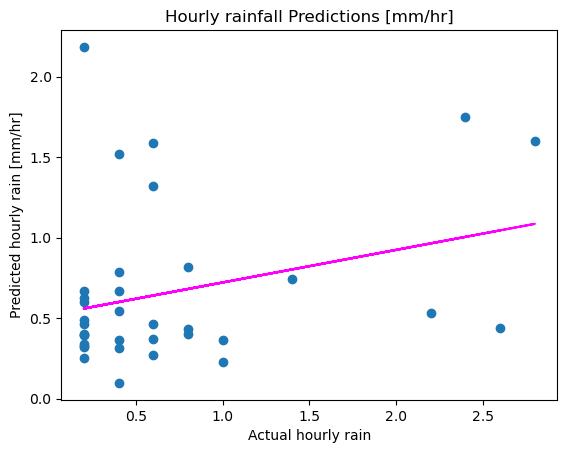

In [30]:
# Get predictions
predictions = model.predict(X_test)

# Display metrics
mse = mean_squared_error(y_test, predictions)
print("MSE:", mse)
rmse = np.sqrt(mse)
print("RMSE:", rmse)
r2 = r2_score(y_test, predictions)
print("R2:", r2)

# Plot predicted vs actual
plt.scatter(y_test, predictions)
plt.xlabel('Actual hourly rain')
plt.ylabel('Predicted hourly rain [mm/hr]')
plt.title('Hourly rainfall Predictions [mm/hr]')
z = np.polyfit(y_test.flatten(), predictions.flatten(), 1)
p = np.poly1d(z)
plt.plot(y_test,p(y_test), color='magenta')
plt.show()

###  try Train the model : RandomForestRegressor

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  [0, 1, 2, 3])])),
                ('regressor', RandomForestRegressor())]) 

MSE: 0.8018772571428571
RMSE: 0.895475994732889
R2: -0.5778393086610127


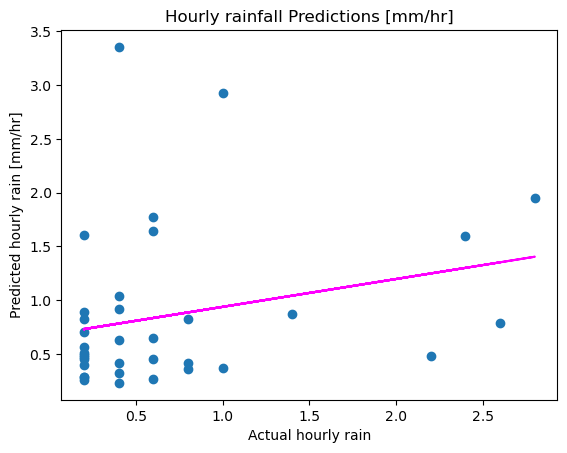

In [31]:
# Use a different estimator in the pipeline
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('regressor', RandomForestRegressor())])


# fit the pipeline to train a linear regression model on the training set
model = pipeline.fit(X_train, (y_train))
print (model, "\n")

# Get predictions
predictions = model.predict(X_test)

# Display metrics
mse = mean_squared_error(y_test, predictions)
print("MSE:", mse)
rmse = np.sqrt(mse)
print("RMSE:", rmse)
r2 = r2_score(y_test, predictions)
print("R2:", r2)

# Plot predicted vs actual
plt.scatter(y_test, predictions)
plt.xlabel('Actual hourly rain')
plt.ylabel('Predicted hourly rain [mm/hr]')
plt.title('Hourly rainfall Predictions [mm/hr]')
z = np.polyfit(y_test.flatten(), predictions.flatten(), 1)
p = np.poly1d(z)
plt.plot(y_test,p(y_test), color='magenta')
plt.show()

## Use the Trained Model

In [32]:
import joblib

# Save the model as a pickle file
filename = '../2results/0models/rain_hour1.pkl'
joblib.dump(model, filename)

['../2results/0models/rain_hour1.pkl']

In [33]:
# Load the model from the file
loaded_model = joblib.load(filename)

# Create a numpy array containing a new observation (for example tomorrow's seasonal and weather forecast information)
X_new = np.array([[10,20,30,25]]).astype('float64')
print ('New sample: {}'.format(list(X_new[0])))

# Use the model to predict tomorrow's rentals
result = loaded_model.predict(X_new)
print('Prediction: {:.0f} hourly rain'.format(np.round(result[0])))

New sample: [10.0, 20.0, 30.0, 25.0]
Prediction: 1 hourly rain


#### predict หลายอินพุธ


In [34]:
# An array of features based on five-day weather forecast
X_new = np.array([[20,25,30,35],
                  [22,25,35,45],
                  [23,28,37,35],
                  [21,20,30,15],
                  [10,15,30,35]])

# Use the model to predict rentals
results = loaded_model.predict(X_new)
print('5-predictions:')
for prediction in results:
    print(np.round(prediction))

5-predictions:
1.0
2.0
1.0
2.0
1.0


# Next Try ใน colab
## DL ANN
https://www.kaggle.com/code/abrahamanderson/artificial-neural-networks-for-regression
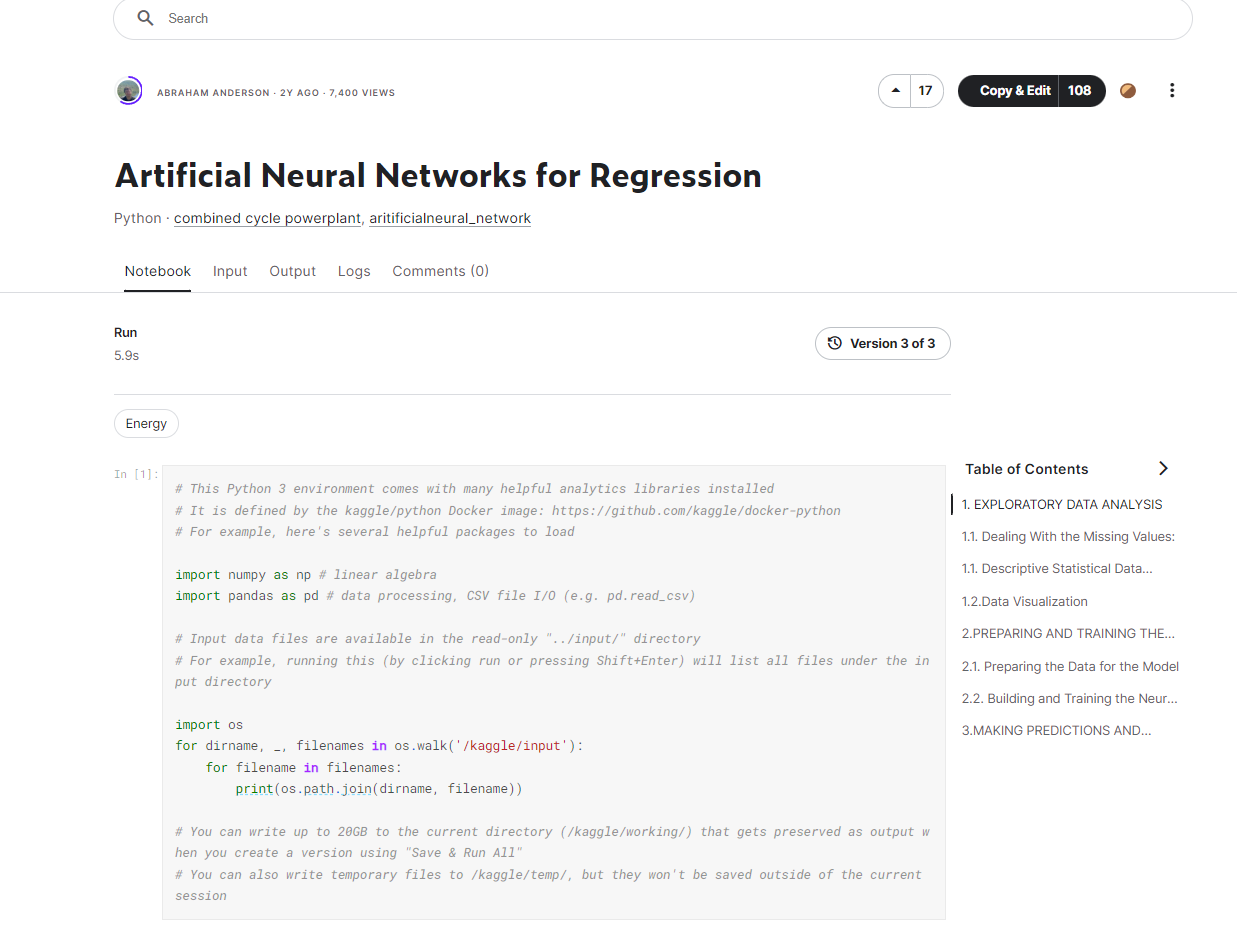

## ทดสอบ ML 
https://www.kaggle.com/code/venkatkrishnan/regression-model-on-multicollinary-dataset

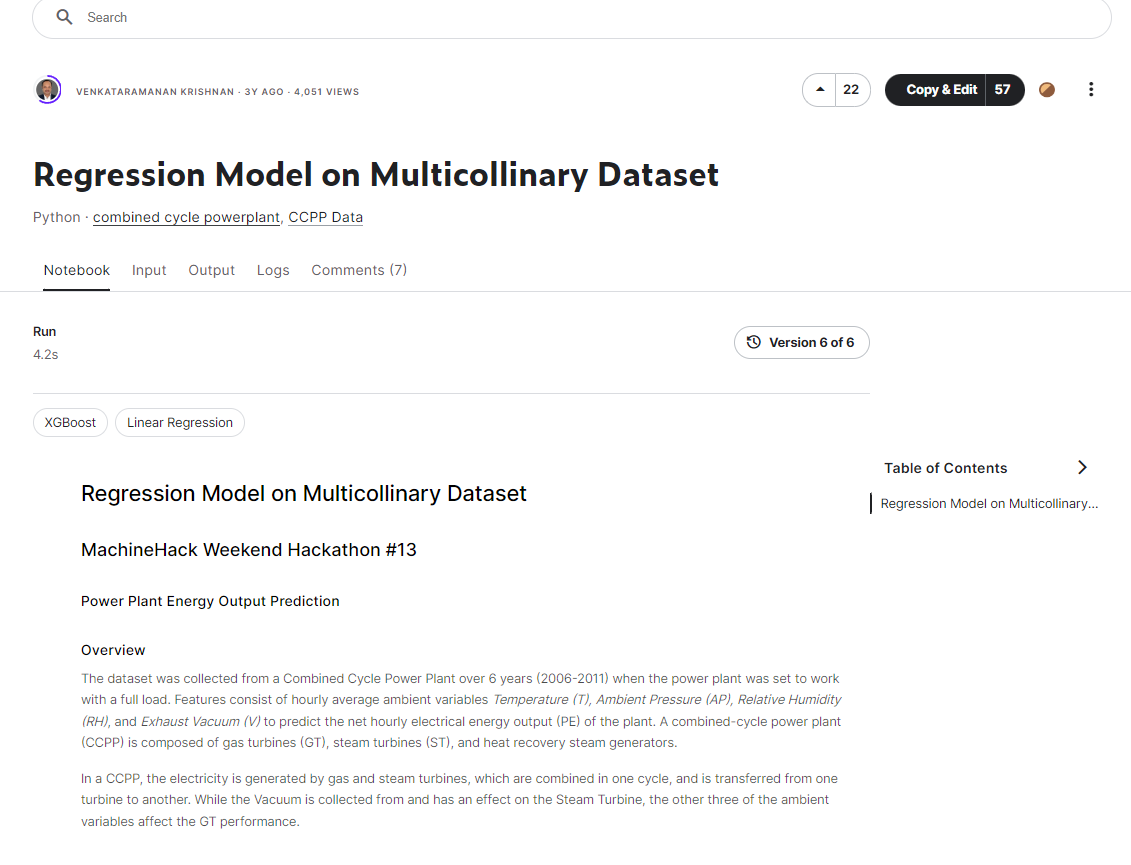

# ข้อสังเกตุ
* หากไม่กรองฝนอ่อนออกไป การสร้างโมเดลจะเกิดค่าฝนทำนายที่เป็นค่าน้อย ๆ ที่จะไปจับคู่กับฝนสถานีสสน.ที่เป็นค่าน้อย ทำให้แบบจำลองMLที่ได้มีปัญหา การ validate ได้ค่า R2 ต่ำ
* ควรทำการสกัดฝนมากกว่า 30 วัน ในช่วงมรสุม พายุ เพื่อให้ได้ค่าตัวอย่างมาสร้างโมเดลให้เพียงพอ
* เล่น K-fold for model selection > K-fold parameter tuning > Grid search approch for parameter tuning > Preprocess data pipeline (Standarscale)

* อ่าน K-fold https://www.analyticsvidhya.com/blog/2022/02/k-fold-cross-validation-technique-and-its-essentials/#:~:text=K%2Dfold%20cross%2Dvalidation%20is,estimate%20the%20model's%20generalization%20performance.

อ่าน K-fold https://www.analyticsvidhya.com/blog/2022/02/k-fold-cross-validation-technique-and-its-essentials/#:~:text=K%2Dfold%20cross%2Dvalidation%20is,estimate%20the%20model's%20generalization%20performance.
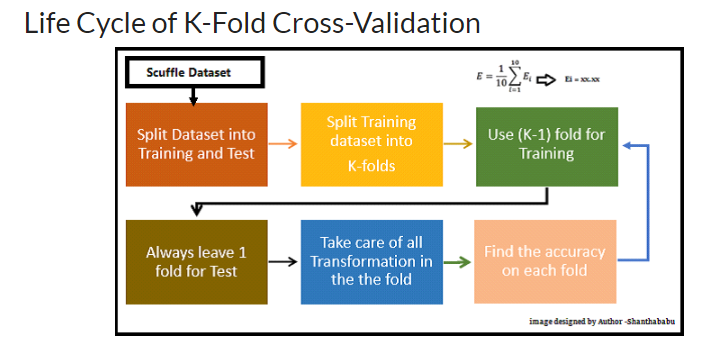

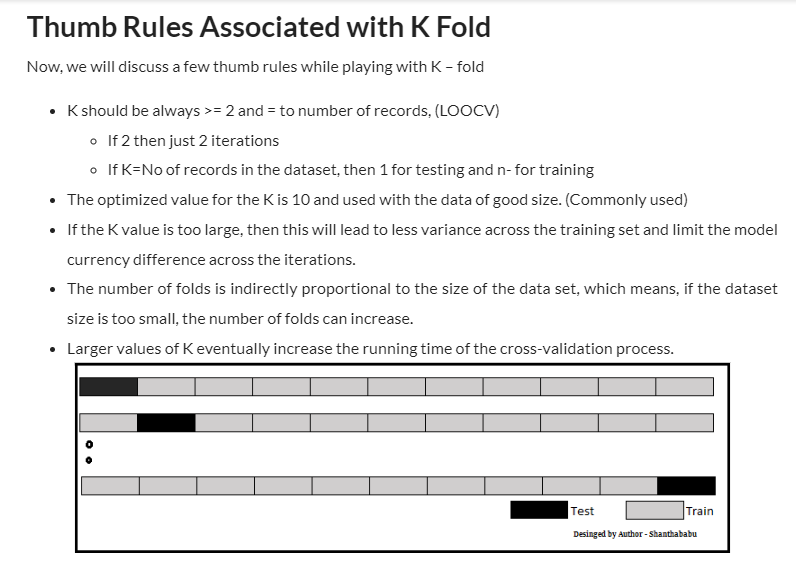

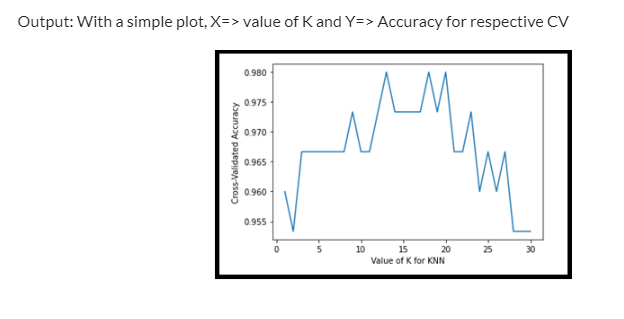


# เล่นการกับเลือก feature important 

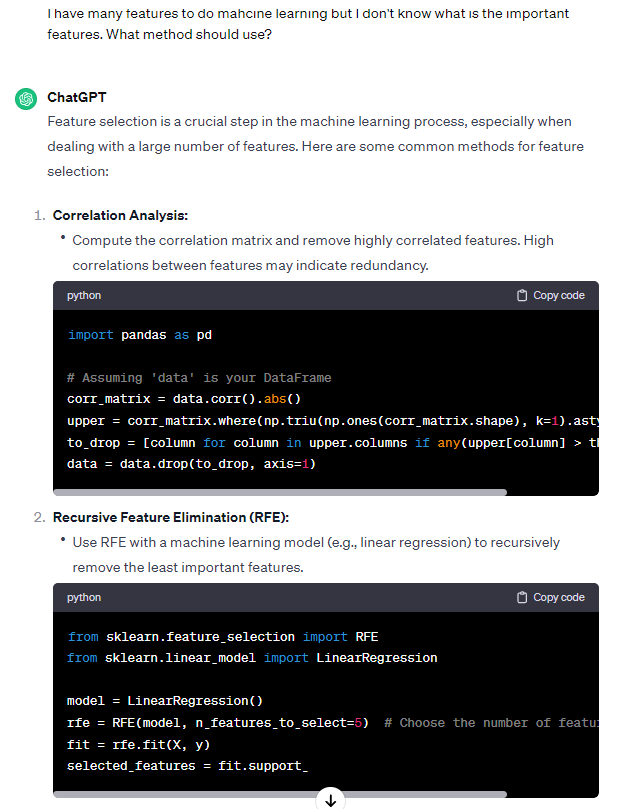

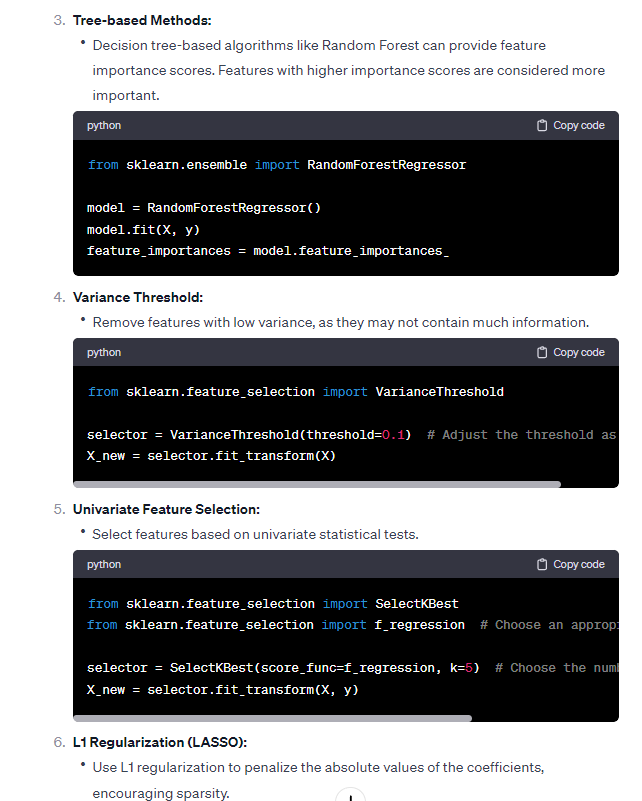

# เล่นกับ K-fold model selection

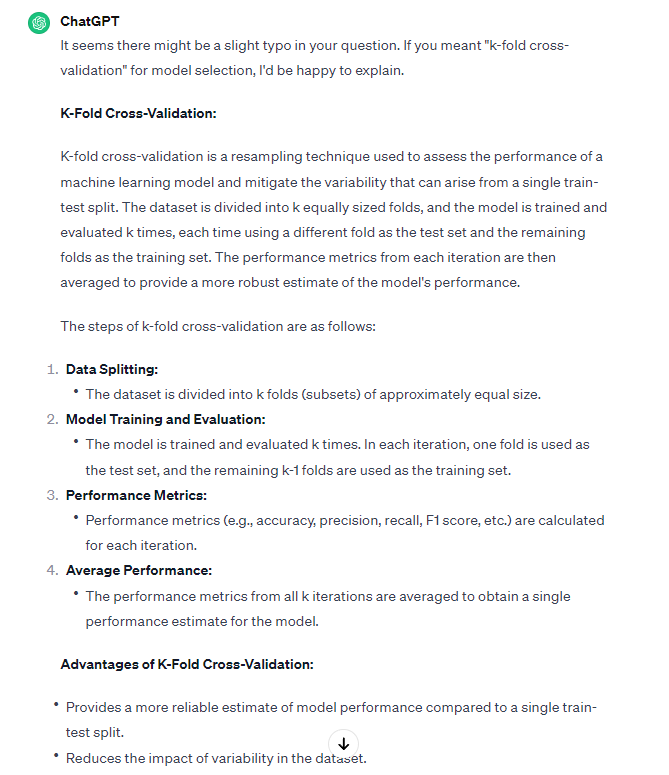

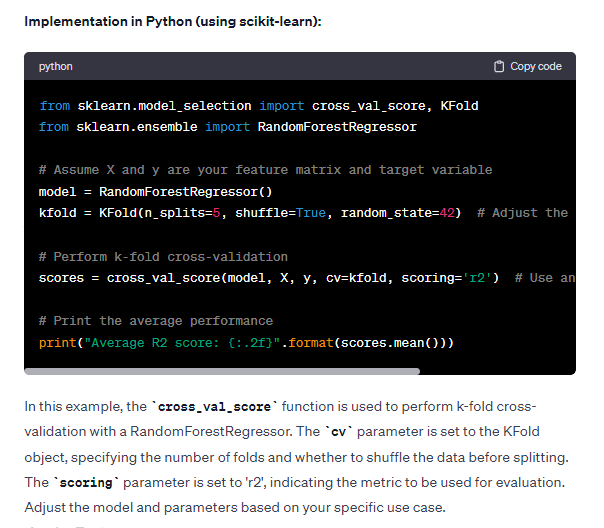


# เล่นกับแบบจำลอง multiple regression ด้วย machine learning ที่สำคัญ

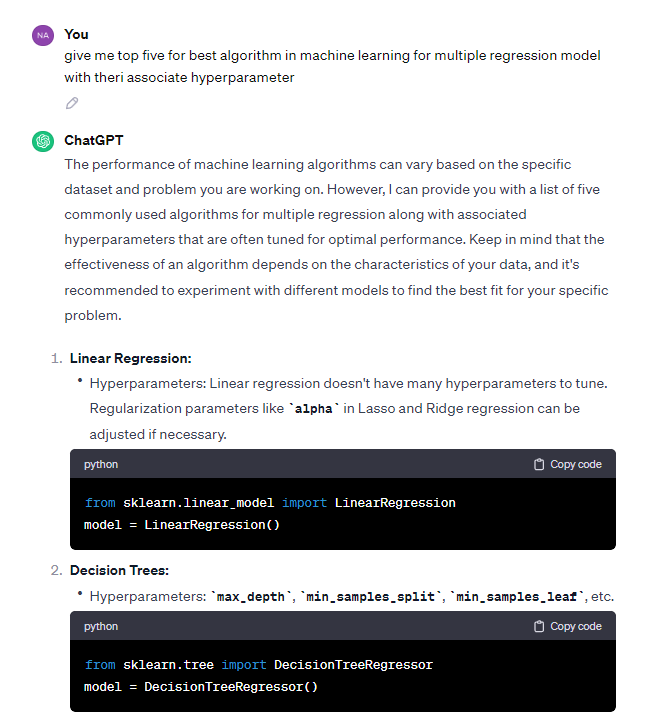

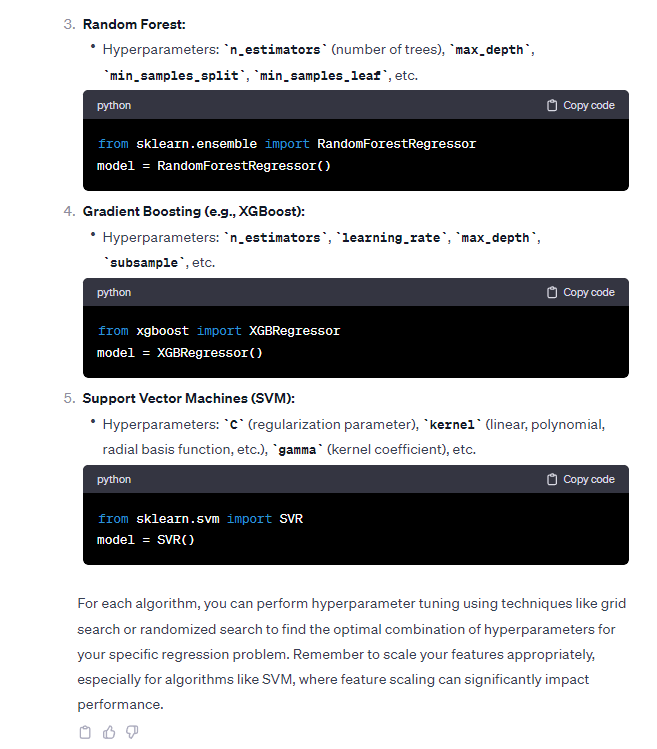